#**Predicción de la duración del sueño en consumidores de café como indicador de riesgo en salud**
---
---



##**1. Descripción de la situación problemática**
---



El café es una de las bebidas más consumidas en todo el mundo (Poole et al., 2017), lo que justifica la necesidad de evaluar sus efectos individuales y poblacionales. Según la Clínica Mayo, el café puede ser beneficioso para la salud, aunque sus efectos dependen de múltiples factores, como la cantidad ingerida, la edad, el género, la medicación concomitante y la genética. Diversos autores señalan que no existe un consenso absoluto, ya que se observan tanto beneficios como perjuicios en la literatura científica.

El café tostado, forma comercialmente más extendida, contiene numerosos compuestos bioactivos. El más conocido es la cafeína, un psicoestimulante moderado. Gardiner et al. (2025) destacan que la cafeína mejora el estado de alerta y el rendimiento cognitivo, lo que explica su uso extendido. Sin embargo, el café no es la única fuente de cafeína, ya que también se encuentra en té, bebidas energéticas y ciertos fármacos.

La composición química de una taza de café varía según el tipo de grano, el método de preparación y la forma de infusión. Además, factores individuales como el genotipo y la microbiota intestinal determinan la biodisponibilidad y el metabolismo de la cafeína (Poole et al., 2017).

Entre los efectos positivos para la salud, se han descrito asociaciones con menor riesgo de enfermedad de Parkinson, diabetes tipo 2, Alzheimer, síndrome metabólico, enfermedad renal crónica, cáncer hepático y enfermedad hepática, así como cálculos biliares y renales. También se ha relacionado con mejor estado de ánimo, menor riesgo de depresión y reducción del riesgo de accidente cerebrovascular con un consumo de 3–4 tazas/día (Clínica Mayo). No obstante, los efectos adversos incluyen ansiedad, cefaleas, taquicardia, acidez, reflujo y, en ciertos casos, alteraciones en los niveles de colesterol o disminución de la densidad ósea en mujeres con consumo elevado (>5 tazas/día). En mujeres embarazadas o en periodo de lactancia  se recomienda limitar la cafeína a 200 mg/día debido a su paso al feto o al lactante.

Uno de los efectos negativos más consistentes de la cafeína es su impacto en el sueño. Este alcaloide actúa sobre el sistema nervioso central, alterando la homeostasis sueño-vigilia (Gardiner et al., 2025). Se estima que cerca del 40 % de la población duerme menos de lo recomendado, lo que lleva a un uso compensatorio de la cafeína. Sin embargo, el mayor impacto aparece en el sueño posterior a la ingesta: estudios experimentales muestran que dosis de 100–600 mg incrementan significativamente la latencia de inicio del sueño (LIS) y los despertares tras el inicio (DIS), reduciendo el tiempo total de sueño (TTS). Además, existe una relación dosis-dependiente: a mayor ingesta, mayores alteraciones del sueño (Gardiner et al., 2025).

En este contexto, resulta relevante explorar nuevas herramientas que permitan comprender mejor la interacción entre consumo de cafeína y patrones de sueño. Actualmente, la inteligencia artificial y los modelos de machine learning se aplican crecientemente al estudio de la salud del sueño, ya que permiten integrar múltiples variables de estilo de vida, demográficas y clínicas para predecir resultados de interés, como la duración y calidad del sueño. Estos enfoques no solo facilitan la identificación de factores de riesgo individuales, sino que también aportan evidencia aplicable al diseño de estrategias de prevención y concientización en salud pública.

Este análisis está dirigido principalmente a profesionales de la salud y responsables de gestión en salud pública. Su propósito es aportar evidencia sobre cómo los hábitos cotidianos —especialmente el consumo de cafeína— pueden influir en la duración y calidad del sueño, favoreciendo el diseño de estrategias preventivas y de promoción del bienestar.

Dado que los efectos del café son heterogéneos y dependen de múltiples factores individuales y contextuales (Poole et al., 2017; Mayo Clinic, 2025; Gardiner et al., 2025), resulta pertinente aplicar enfoques de ciencia de datos y modelos de machine learning que permitan integrar estas variables y predecir consecuencias en la salud, como la duración del sueño.

##**2. Objetivo**
---






En base a la problematica planteada el objetivo del proyecto es

*Desarrollar un modelo de regresión exploratorio para predecir la duración del sueño en consumidores de café, con el propósito de identificar los factores que más influyen en el descanso y analizar su posible impacto en la salud pública.*

##**3. Dataset**
---



###**3.1 Fuente**

 Este dataset se obtuvo de: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset

###**3.2 Características generales**

El conjunto de datos GlobalCoffeeHealth contiene 10.000 registros sintéticos que reflejan patrones reales de consumo de café, hábitos de sueño y resultados de salud en 20 países. Incluye datos demográficos, consumo diario de café, niveles de cafeína, duración y calidad del sueño, Indice de Masa Corporal (IMC), frecuencia cardíaca, estrés, actividad física, problemas de salud, ocupación, tabaquismo y consumo de alcohol.

El conjunto de datos captura correlaciones realistas observadas en investigaciones, como el impacto de la cafeína en el sueño, el estrés y la salud, lo que lo hace ideal para análisis estadísticos, modelos predictivos y estudios de estilo de vida o bienestar.




###**Criterio de selección**

El dataset fue seleccionado por presentar un volumen suficiente de observaciones (10 000 filas) y una diversidad de variables (tanto cuantitativas como categóricas). Además, contiene pocos valores nulos, lo que facilita el preprocesamiento y garantiza mayor confiabilidad en los resultados. En las secciones siguientes se detallan los pasos realizados que respaldan esta elección.


##**4. Data Wrangling**
---



###**4.1 Importación y lectura del dataset**

Se utilizan las siguientes librerias, previamente se debiron instalar :

In [ ]:
# pip install scikit_posthocs

In [ ]:
# pip install -U kaleido #motor de renderización para Plotly

In [ ]:

#===== Manejo de datos =======
import numpy as np
import pandas as pd

#====== Visualizaciones gráficas ====
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#======= Análisis estadístico=======
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr, ttest_ind, chi2_contingency, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp


Se establece el siguiente acceso al dataset, generando un dataframe(df) nombrado *df_coffee*:

In [ ]:
url='https://raw.githubusercontent.com/agus-astolfo/Data_Science_II/refs/heads/main/synthetic_coffee_health_10000.csv'
df_coffee= pd.read_csv(url, sep=',')

#### **4.1.1.Visualización del dataset**



En primera instancia, se procedió a la exploración del dataset mediante la visualización directa del dataframe (`df_coffee`). Esto permitió obtener una vista general de su contenido y detectar rápidamente la presencia de valores no uniformes o nulos (NaN).

Posteriormente, se consultaron los nombres de las columnas con `df_coffee.columns`, lo que facilitó identificar las variables disponibles. Para una revisión preliminar de los datos, se utilizaron las funciones `df_coffee.head() `(muestra las primeras 5 filas) y `df_coffee.sample(5)` (muestra 5 filas seleccionadas aleatoriamente), lo que permitió observar ejemplos de registros reales.

Finalmente, se ejecutó la función `df_coffee.info()`, que brindó un resumen del número de observaciones y columnas, los tipos de datos presentes, la cantidad de valores no nulos y una noción general de la completitud y calidad del dataset.

In [ ]:
df_coffee


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [ ]:
df_coffee.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [ ]:
df_coffee.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df_coffee.sample(5)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
9503,9504,22,Male,Switzerland,1.2,114.6,9.3,Excellent,27.9,56,Low,6.7,NaN,Service,0,1
9017,9018,26,Male,France,5.8,555.2,4.3,Poor,22.5,79,High,1.4,Mild,Healthcare,0,1
8903,8904,36,Male,Switzerland,1.2,110.0,7.1,Good,22.5,54,Low,12.8,NaN,Healthcare,0,0
6656,6657,19,Male,South Korea,1.6,149.7,6.7,Good,25.9,62,Low,7.0,NaN,Service,1,0
1124,1125,54,Female,USA,2.0,191.6,5.4,Fair,27.0,81,Medium,5.9,Moderate,Student,0,1


In [ ]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

El dataframe df_coffee cuenta con 10000 datos (filas) y 16 columnas. Se observan datos faltantes o nulos en la variable Health_Issues

###**4.2 Diccionario de variables**

La forma de lectura se la siguiente, nombre de columna (en negrita) [tipo de dato]: descripción de la columna ya sea explicando el nombre y/o estableciendo rangos.


*   **ID** *[Integer]*: Dato único de identificación o registro ID (1–10000)
*   **Age** *[Integer]*: Edad de los participantes(18–80 years)
*   **Gender** *[Categorical]*: Male, Female, Other
*   **Country** *[Categorical]*: Pais de residencia (20 paises)
*   **Coffee_Intake** *[Float]*: Consumo diario de café en tazas (0–10)
*  **Caffeine_mg** *[Float]*: Ingesta diaria estimada de cafeina en mg (1 taza ≈ 95 mg)
*   **Sleep_Hours** *[Float]*: Promedio de horas de sueño por noche (3–10 horas)
*   **Sleep_Quality** *[Categorical]*: Poor, Fair, Good, Excellent -basado en las horas de sueño-
*   **BMI** *[Float]*: Indice de masa corporal -en inglés Body Mass Index- (15–40)
*   **Heart_Rate** *[Integer]*: Frecuencia cardíaca en reposo (50–110 bpm) bpm =beats per minute, en español son los latidos por minuto.
*   **Stress_Level** *[Categorical]*: Low, Medium, High -basado en las horas de sueño y el estilo de vida-
*   **Physical_Activity_Hours** *[Float]*: Actividad física semanal (0–15 horas)
*   **Health_Issues** *[Categorical]*: None, Mild, Moderate, Severe -según la edad, el IMC y el sueño-
*   **Occupation** *[Categorical]*: Office, Healthcare, Student, Service, Other.
*   **Smoking** *[Boolean]*: 0 = No, 1 = Yes
*   **Alcohol_Consumption** *[Boolean]*: 0 = No, 1 = Yes







Se realizan 2 tablas con las traducciones de cada variable y para las variables categóricas las traducciones de la categorias, permitiendo asi una mejor comprensión.

| Variable                                | Traducción                   |
|---------------------------------------  |----------------------------- |
| ID.                                     | ID                           |
| Age                                     | Edad                         |
| Gender (Male|Female|Other)              | Género                       |
| Country                                 | País                         |
| Coffee_Intake                           | Consumo o ingesta de café    |
| Caffeine_mg                             | Cafeína en mg                |
| Sleep_Hours                             | Horas de sueño               |
| Sleep_Quality                           | Calidad de sueño             |
| BMI                                     | IMC(Indice de MasaCorporal)  |
| Heart_Rate                              | Frecuencia cardiaca          |
| Physical_Activity_Hours                 | Horas de actividad física    |
| Health_Issues.                          | Problemas de salud           |
| Occupation                              | Ocupación                    |
| Smoking                                 | Tabaquismo                   |
| Alcohol_Consumption                     | Consumo de alcohol           |




| Categorias              | Traducción Categorias  |
|-------------------------|------------------------|
| Male                    | Masculino              |
| Female                  | Femenino               |
| Other                   | Otro                   |
| Poor                    | Pobre o bajo           |
| Fair                    | Regular                |
| Good                    | Bueno                  |
| Excellent               | Excelente              |
| Low                     | Bajo                   |
| Medium                  | Medio                  |
| High                    | Alto                   |
| None                    | Ninguno                |
| Mild                    | Leve                   |
| Moderate                | Moderado               |
| Severe                  | Severo                 |
| Office                  | Oficina                |
| Healthcare              | Salud                  |
| Student                 | Estudiante             |
| Service                 | Servicio               |
| Yes                     | Si                     |

####*Aclaraciones o información complementaria*



*   **Heart_Rate** (frecuencia cardiaca en reposo):
Segun la [Clinica Mayo](https://https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979) una frecuencia cardíaca en reposo normal para adultos oscila entre 60 y 100 latidos por minuto.
Si la frecuencia cardíaca en reposo se mantiene constantemente por encima de 100 latidos por minuto se trata de taquicardia, o si no se es un atleta entrenado y la frecuencia cardíaca en reposo es inferior a 60 latidos por minuto se habla de bradicardia.


*   **Sleep_Quality** (calidad del sueño):
En este caso según especifica la fuente del dataset se basó en la cantidad de horas. Por lo tanto, para determinar a que rangos de horas de sueño (sleep_hours) corresponde cada categoria, hay que relacionar ambas variables y describirlas. Pero a modo de referencia se busca en bibliografica cual es la cantidad de horas de sueño recomendada para adultos. Según el National Institutes of Health (NIH)([horas de sueño recomendadas](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Adults%20who%20sleep%20less%20than,and%20people%20who%20are%20sick.)), es de 7 a 9 horas.

*   **Sleep_Hours** Según NIH los expertos recomiendan que los adultos deberian dormir entre 7 y 9 hs por dia. Adicionan  que los adultos que duermen menos de 7 horas por noche pueden tener más problemas de salud que quienes duermen 7 o más horas y que si bien dormir más de 9 horas por noche no es necesariamente perjudicial, puede ser beneficioso para los adultos jóvenes, las personas que se recuperan de la falta de sueño y las personas enfermas.(ver link en Sleep_Quality).


* **BMI** (Indice de masa corporal -en inglés Body Mass Index- ): El CDC (U.S. Centers of Desease Control and Prevention) establece rangos de valores de BMI para adultos (> ó = a 20 años) en el siguiente link [CDC-BMI](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html#:~:text=kg/m2). Pero basicamente en bibliografia esta tabulado para cada rango de BMI a que categoria corresponde, que va desde Bajo peso cuando este valor es menor a 18.5 a distintos grados de obesidad arrancando con un BMI mayor a 30.0. El rango de peso saludable se enuentra entre los 18.5 y menor de 25.0. Existe la posibilidad de valores de BMI <16,  estan categorizados según las [WHO](https://https://apps.who.int/nutrition/landscape/help.aspx?menu=0&helpid=420#:~:text=Moderate%20and%20severe%20thinness:%20A,therefore%20a%20valid%20extreme%20limit.) -World Helath Organization- asociado con un riesgo significativamente mayor de mala salud, bajo rendimiento físico, letargo e incluso muerte

*   **Physical_Activity_Hours** (horas de actividad física por semana): Una de las recomendacione para población adulta, es tratar de hacer un total entre 150 a 300 minutos (**2,5 a 5 horas**) de actividad aeróbica de intensidad moderada o entre 75 a 150 minutos (**1,25 a 2,5 horas**) de alta intensidad cada semana, o una combinación de ambos.  [recomendaciones](https://medlineplus.gov/spanish/howmuchexercisedoineed.html). La [Mayo Clinic](https://www.mayoclinic.org/es/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916) enfatiza en que para beneficiar más tu salud, en las pautas se sugiere hacer 300 minutos (**5 horas**) o más de actividad aeróbica moderada a la semana.




###**4.3 Tranformación de datos**

####4.3.1 Estandarización columnas

De esta forma nos aseguramos que todas posean un estilo uniforme de escritura que permita trabajar sin inconvenientes.

In [ ]:
df_coffee.columns = (
    df_coffee.columns
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
      .str.lower()
)

In [ ]:
df_coffee.columns


Index(['id', 'age', 'gender', 'country', 'coffee_intake', 'caffeine_mg',
       'sleep_hours', 'sleep_quality', 'bmi', 'heart_rate', 'stress_level',
       'physical_activity_hours', 'health_issues', 'occupation', 'smoking',
       'alcohol_consumption'],
      dtype='object')

####4.3.2 ID como índice

Se decide tomar como indice el ID en vez del index, para una mejor visualización

In [ ]:
df_coffee.set_index("id", inplace=True)

In [ ]:
df_coffee.head()

,age,gender,country,coffee_intake,caffeine_mg,sleep_hours,sleep_quality,bmi,heart_rate,stress_level,physical_activity_hours,health_issues,occupation,smoking,alcohol_consumption
id,,,,,,,,,,,,,,,
1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


####4.3.3 Recodificación o normalización de categorias

Se decide reemplazar en columna 'gender':

*   Masculino(Male) = M
*   Femenino (Female) = F
*   Otro (Other) = O

De esta forma se comprende a que género hace referencia, y permite mejores visualizaciones a futuro.

In [ ]:
df_coffee["gender"] = df_coffee["gender"].replace({
    "Male": "M",
    "Female": "F",
    "Other": "O"
})

Para asegurarnos que realmente fue efectivo el reemplazo

In [ ]:
print(df_coffee["gender"].unique())

['M' 'F' 'O']


#### 4.3.4 Tipificación de columnas

#####4.3.4.1 Inicial

Se decide realizar la separación de las variables en numéricas y categóricas, ya que cada tipo de variable requiere un tratamiento diferenciado. Las variables numéricas, permiten aplicar técnicas como imputación por medidas de tendencia central, normalización o detección de valores atípicos. En cambio, las variables categóricas requieren imputación por categorías y posteriormente codificación para que puedan ser utilizadas por los algoritmos de aprendizaje automático.
El proceso de tipificación no altera la información original del dataset, sino que organiza las variables según su naturaleza, lo cual garantiza un preprocesamiento más adecuado y mejora la calidad del modelo predictivo.

In [ ]:

numeric_cols = df_coffee.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_coffee.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", numeric_cols)
print("Categóricas:", categorical_cols)

Numéricas: ['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours', 'bmi', 'heart_rate', 'physical_activity_hours', 'smoking', 'alcohol_consumption']
Categóricas: ['gender', 'country', 'sleep_quality', 'stress_level', 'health_issues', 'occupation']


A fin de separar la variable target para simplificar el trabajo posterior a la hora de implementar el modelo prefictivo y no sea confundida con una variable secundaria, se decide separar ésta de la lista de columnas en donde se encuentra. En nuestro caso la variable en cuestion es '*sleep_hours*' que es numérica.  

In [ ]:
TARGET = "sleep_hours"
if TARGET in numeric_cols:
    numeric_cols.remove(TARGET)
print("Target:", TARGET)

Target: sleep_hours


#####4.3.4.2 Ajustada

Dado que dentro de las variables numéricas se encuentran 'smoking'  y 'alcohol_consumption' que por descripcion tiene el tipo de dato 'int' pero solo pueden tomar valores binario (0/1), se decide cambiar el tipo de variable a categorica, ya que no seria apropiado incluirlas en los analisis de tendencia central que se suele realizar para variables numéricas.

In [ ]:
df_coffee['smoking'] = df_coffee['smoking'].astype('category')
df_coffee['alcohol_consumption'] = df_coffee['alcohol_consumption'].astype('category')


Se corrobora el cambio

In [ ]:
cols = ['smoking', 'alcohol_consumption']
print(df_coffee[cols].dtypes)


smoking                category
alcohol_consumption    category
dtype: object


Se adicionan a las variables categoricas iniciales

In [ ]:
categorical_cols += df_coffee.select_dtypes(include='category').columns.tolist()
print("Categóricas:", categorical_cols)

Categóricas: ['gender', 'country', 'sleep_quality', 'stress_level', 'health_issues', 'occupation', 'smoking', 'alcohol_consumption']


###**4.4   Identificación de Valores Nulos**

Se realiza un conteo de datos nulos, esto reafirma lo observado cuando se realizó la función `df_coffee.info()`, donde la unica variable que presentaba datos no nulos menores a la cantidad de datos totales fue health_issues. Se refuearza de manera gráfica con la matriz.

In [ ]:
print(df_coffee.isnull().sum().to_frame('conteo'))

                         conteo
age                           0
gender                        0
country                       0
coffee_intake                 0
caffeine_mg                   0
sleep_hours                   0
sleep_quality                 0
bmi                           0
heart_rate                    0
stress_level                  0
physical_activity_hours       0
health_issues              5941
occupation                    0
smoking                       0
alcohol_consumption           0


<Axes: >

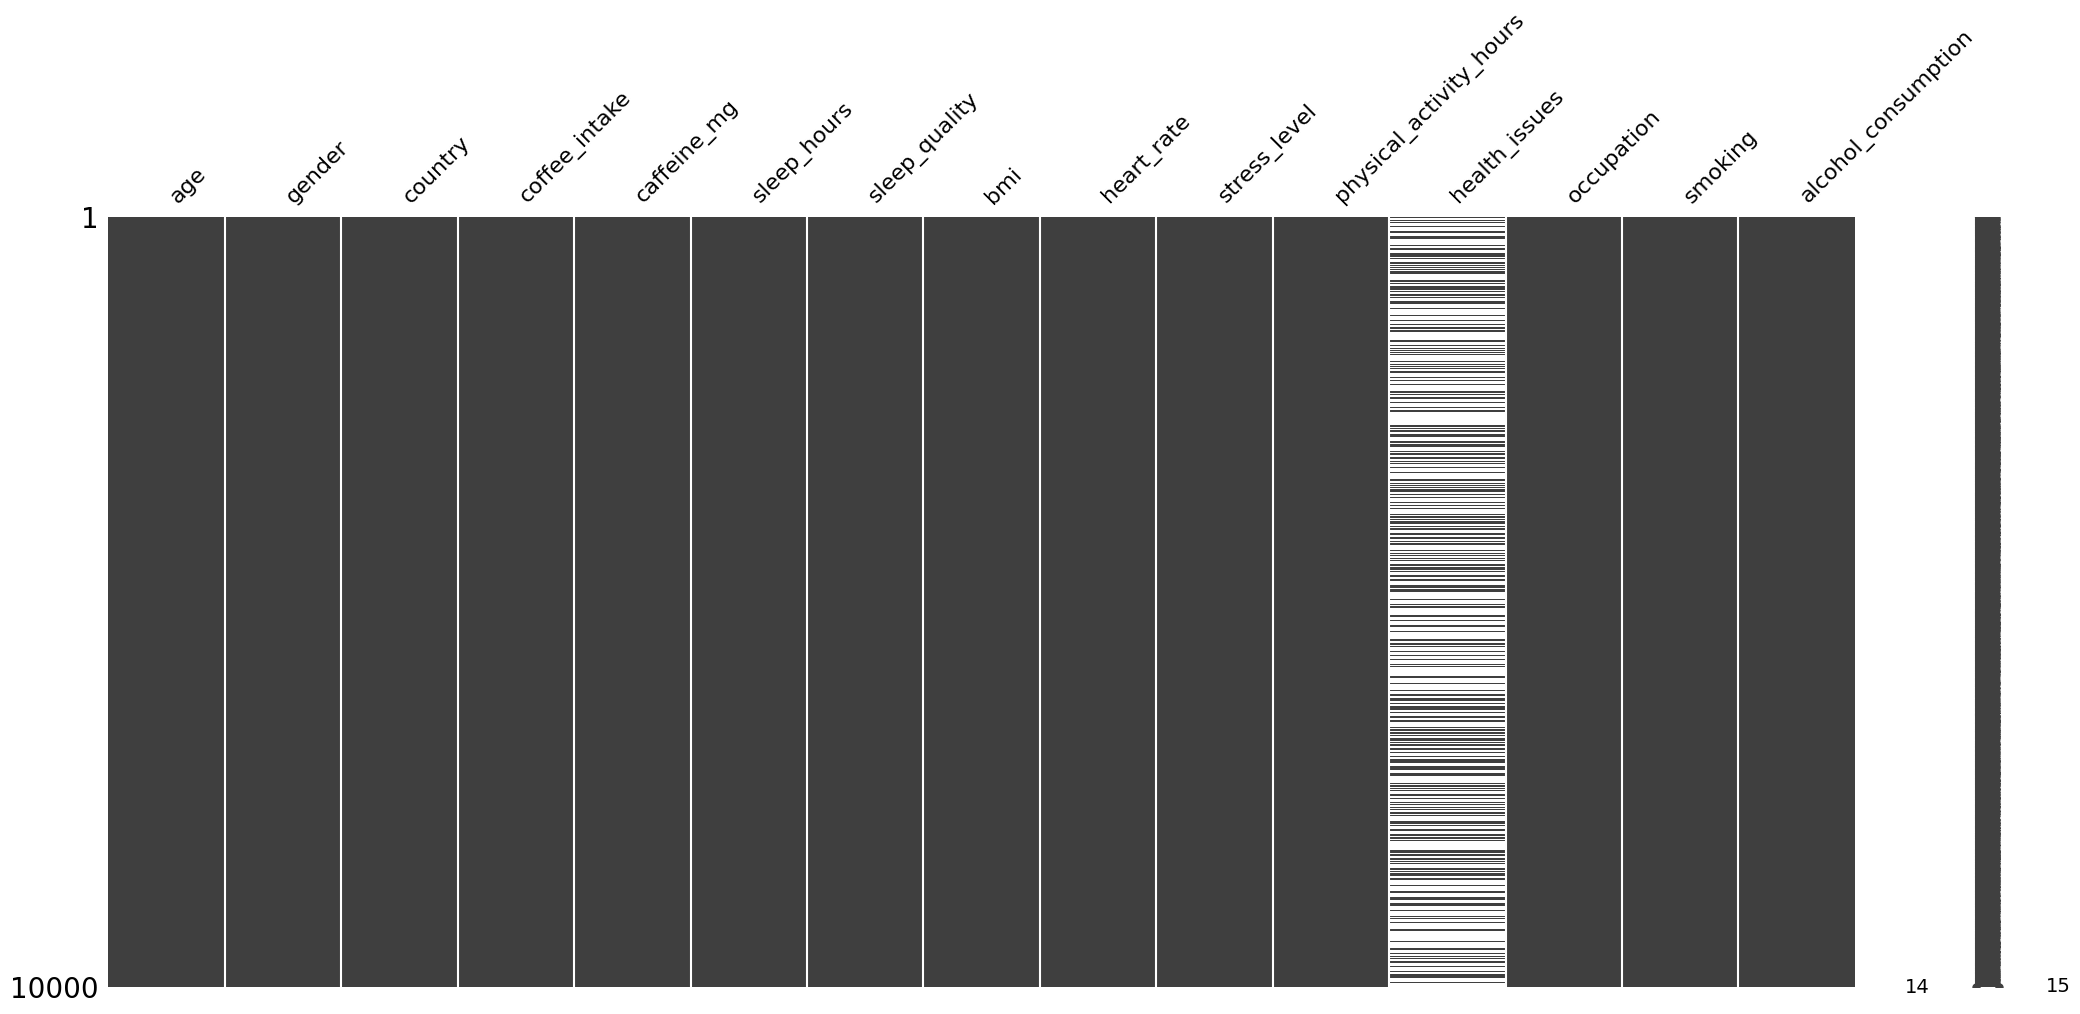

In [ ]:
msno.matrix(df_coffee)

Valores nulos encontrados: 5941 en health_issues.

Como dentro de la calsificacion para esta columna se describia la categoria 'None', se trata de analizar si los valores son realmente 'NaN' o son 'None' como texto, asi de esta forma se realiza algún tratamiento.

Primero se evaluan los "None" como texto y luego los NaN

In [ ]:
# Evalua los "None" como texto
nones_texto = df_coffee[df_coffee["health_issues"] == "None"]
#Cuenta "None" como texto de existir
(df_coffee["health_issues"] == "None").sum()

np.int64(0)

In [ ]:
# Evalua los NaN o nulos reales
nulos_reales = df_coffee[df_coffee["health_issues"].isna()]
#cuenta la cantidad de nulos reales encontrados
df_coffee["health_issues"].isna().sum()

np.int64(5941)

In [ ]:
#Se termina de confirmar los valores que toman los datos de la columna "health_issues"
df_coffee["health_issues"].unique()

array([nan, 'Mild', 'Moderate', 'Severe'], dtype=object)

Se puede observar que aunque en la descripción de la clasificación figuraba de la siguiente forma:

*Health_Issues - Categorical - None, Mild, Moderate, Severe (based on age, BMI, and sleep)*

Se puedo evaluar que no existia el texto "None" y en cambio existian valores nulos reales (NaN), los cuales necesitan ser tratados

###**4.5   Manejo de Valores Nulos**

Por lo antes expuesto se decide tratar a los valores nulos reeplazandolos por el texto "None" haciendo alución a que no existieron problemas de salud y en concordancia con *Health_Issues - Categorical - None, Mild, Moderate, Severe (based on age, BMI, and sleep)*

In [ ]:
df_coffee["health_issues"] = df_coffee["health_issues"].fillna("None")

In [ ]:
df_coffee.sample(5)

,age,gender,country,coffee_intake,caffeine_mg,sleep_hours,sleep_quality,bmi,heart_rate,stress_level,physical_activity_hours,health_issues,occupation,smoking,alcohol_consumption
id,,,,,,,,,,,,,,,
1054,38,F,Netherlands,6.2,588.3,5.5,Fair,26.2,90,Medium,12.1,Mild,Service,0,0
9558,43,F,India,2.0,186.8,9.4,Excellent,30.0,80,Low,1.4,Mild,Office,0,1
6980,18,F,Switzerland,0.0,0.0,7.2,Good,23.1,78,Low,5.9,None,Healthcare,0,0
2764,27,F,UK,2.9,278.8,7.1,Good,21.1,74,Low,9.4,None,Service,0,0
5281,27,M,Belgium,2.9,277.3,5.0,Poor,19.7,83,High,12.0,Mild,Healthcare,0,0


Se observa el reemplazo en la tabla. Igualmente, para corroborar que no existe valores nulos se vuelve a ejecutar el código

In [ ]:
# Evalua los NaN o nulos reales
nulos_reales = df_coffee[df_coffee["health_issues"].isna()]
#cuenta la cantidad de nulos reales encontrados
df_coffee["health_issues"].isna().sum()

np.int64(0)

In [ ]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      10000 non-null  int64   
 1   gender                   10000 non-null  object  
 2   country                  10000 non-null  object  
 3   coffee_intake            10000 non-null  float64 
 4   caffeine_mg              10000 non-null  float64 
 5   sleep_hours              10000 non-null  float64 
 6   sleep_quality            10000 non-null  object  
 7   bmi                      10000 non-null  float64 
 8   heart_rate               10000 non-null  int64   
 9   stress_level             10000 non-null  object  
 10  physical_activity_hours  10000 non-null  float64 
 11  health_issues            10000 non-null  object  
 12  occupation               10000 non-null  object  
 13  smoking                  10000 non-null  category
 14  alcohol_con

De esta forma se observa que ya no existen valores faltantes.

###**4.6   Identificación de duplicados**

In [ ]:
duplicados = df_coffee.duplicated()
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 0


###**4.7   Eliminación de duplicados**

En este caso no aplica porque no existen datos duplicados.
Sino se deberia hacer el siguiente codigo


```
 df_coffee_1 = df_coffe.drop_duplicates()
```
```
print(f"Data después de eliminar duplicados: {len(df_coffee_1)} filas")
```

##**5. Análisis Exploratorio de Datos (EDA)**
---



**Etapas del EDA**: conjunto de pasos para llevar a cabo la exploración de unos datos (preparación, examen gráfico, correlaciones, evaluación de distribuciones, asimetría, valores atípicos e impacto de ausentes)

El proceso que generalmente uno debe realizar es poder

1. Verificacion de datos iniciales  
2. Datos nulos y datos duplicados  
3. Análisis univariado
4. Análisis bivariado
5. Análisis multivariado
6. Tratamiento de Outliers
7. Decisiones a realizar

### **5.1 Verificación de datos iniciales**

En esta etapa se busca familiarizarse un poco mas con los datos y verlos en forma global. Evaluar que tipo de variables tenemos y cuales son las columnas con las que trabajaremos.

Se comienza volviendo a ejecutar como al inicio (apartado 4.1.1) una visualización de los primeros 5 datos, luego describiendo la forma y las columnas.

In [ ]:
df_coffee.head()

,age,gender,country,coffee_intake,caffeine_mg,sleep_hours,sleep_quality,bmi,heart_rate,stress_level,physical_activity_hours,health_issues,occupation,smoking,alcohol_consumption
id,,,,,,,,,,,,,,,
1,40,M,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
2,33,M,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
3,42,M,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
4,53,M,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
5,32,F,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df_coffee.shape

(10000, 15)

In [ ]:
df_coffee.columns

Index(['age', 'gender', 'country', 'coffee_intake', 'caffeine_mg',
       'sleep_hours', 'sleep_quality', 'bmi', 'heart_rate', 'stress_level',
       'physical_activity_hours', 'health_issues', 'occupation', 'smoking',
       'alcohol_consumption'],
      dtype='object')

###**5.2 Verificación de datos nulos y duplicados**



Si bien en la etapa anterior Data Wrangling se evaluó la existencia de datos nulos y duplicados, es una buena práctiva antes de comenzae el análisis reevaluarlos y en caso de existir, decidir como procederemos para manejarlos. En este caso uan forma de evaluarlos es usando la función `.info()`

In [ ]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      10000 non-null  int64   
 1   gender                   10000 non-null  object  
 2   country                  10000 non-null  object  
 3   coffee_intake            10000 non-null  float64 
 4   caffeine_mg              10000 non-null  float64 
 5   sleep_hours              10000 non-null  float64 
 6   sleep_quality            10000 non-null  object  
 7   bmi                      10000 non-null  float64 
 8   heart_rate               10000 non-null  int64   
 9   stress_level             10000 non-null  object  
 10  physical_activity_hours  10000 non-null  float64 
 11  health_issues            10000 non-null  object  
 12  occupation               10000 non-null  object  
 13  smoking                  10000 non-null  category
 14  alcohol_con

De esta forma podemos observar nuevamente que no existen valores nulos. Existen 2 columnas que tiene tipo de dato categocico, 5 con float, 4 con int y 6 son objetos.



Respecto a la presencia de duplicados se vuelve a verificar

In [ ]:
df_coffee.duplicated().sum()

np.int64(0)

**Insights iniciales**

*  No se observan valores nulos
*  No se observan valores duplicados



###**5.3 Análisis univariado**

#### 5.3.1 Estadística descriptiva

Se realiza el analisis estadístico descriprivo, separando en primera instancia las variables numéricas de las categóricas, para ser tratadas tanto a nivel de visualizaciones como a test estadisticos según corersponda.

#####**5.3.1.1 Variables numéricas**

In [ ]:
# Selecciona solo variables numéricas
df_num = df_coffee.select_dtypes(include=np.number)
print(df_num.columns)

Index(['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours', 'bmi',
       'heart_rate', 'physical_activity_hours'],
      dtype='object')


######
**5.3.1.1.1 Descripción general**


Se describen las variables numéricas estableciendo que tipo de variables son, las unidades y los rangos de valores

Los rangos de valores los brinda el dataset a excepción de [caffeine_mg], para cual se calula mínimo y máximo.

*  ` [Age]`: variable numérica contínua; rango de valores: 18 a 80 años.
*   `[coffee_intake]`: variable numérica discreta, rango de valores: 0 a 10 tazas diarias.
*   `[caffeine_mg]`: variable numérica contínua, rango de valores: 0.0 a 780.3 mg por dia
*   `[sleep_hours]`: variable numérica contínua; rango de valores: 3 a 10 horas diarias.
*   `[bmi]`: variable numérica contínua; rango de valores: 15 a 40.
*   `[heart_rate]`: variable numérica discreta; rango de valores: 50 a 110 bpm(=lpm).
*   `[physical_activity_hours]`: variable numérica contínua; rango de valores: 0 a 15 horas semanales.

In [ ]:
# Cálculo de mínimo y máximo
min_val = df_coffee['caffeine_mg'].min()
max_val = df_coffee['caffeine_mg'].max()

print(f"Mínimo: {min_val}")
print(f"Máximo: {max_val}")


Mínimo: 0.0
Máximo: 780.3


######**5.3.1.1.2 Resultados estadísticos básicos**

Se procede entonces a hacer una descripción  de las variables numéricas, pero utilizando percentiles. Se adiciona el calculo del coeficiente de variación  porcentual (CV %), que permite tener una idea de la variabilidad relativa de cada una de las variables.

In [ ]:
# Se crea una variable llamada descripcion que define la funcion .describe() del df
descripcion = df_coffee.describe(percentiles=[i/10 for i in range(1, 10)]).T

# Se crea y agrega la columna de Coeficiente de Variación
descripcion['CV %'] = ((descripcion['std'] / descripcion['mean']) *100)


# Se redondean los resultados
descripcion = descripcion.round(1)

descripcion

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max,CV %
age,10000.0,34.9,11.2,18.0,19.0,24.0,28.0,31.0,34.0,37.4,41.0,45.0,50.0,80.0,31.9
coffee_intake,10000.0,2.5,1.5,0.0,0.5,1.2,1.7,2.1,2.5,2.8,3.3,3.7,4.4,8.2,57.8
caffeine_mg,10000.0,238.4,137.7,0.0,50.3,114.6,158.9,199.6,235.4,270.1,309.9,356.0,417.9,780.3,57.8
sleep_hours,10000.0,6.6,1.2,3.0,5.0,5.6,6.0,6.3,6.6,6.9,7.3,7.7,8.2,10.0,18.4
bmi,10000.0,24.0,3.9,15.0,18.9,20.7,21.9,23.0,24.0,25.0,26.0,27.3,29.0,38.2,16.3
heart_rate,10000.0,70.6,9.8,50.0,58.0,62.0,65.0,68.0,71.0,73.0,76.0,79.0,83.0,109.0,13.9
physical_activity_hours,10000.0,7.5,4.3,0.0,1.5,3.0,4.4,6.0,7.5,9.0,10.5,11.9,13.4,15.0,57.6


Observaciones generales:

*  En varias variables (especialmente **cafeína (mg)** e **ingesta o consumo de cafeina**), el valor máximo se encuentra muy alejado del percentil 90, en algunos casos superando el doble de este. Esto sugiere la presencia de valores atípicos (outliers) que se evaluarán posteriormente.
*  Haciendo foco en los percentiles entre 10 y 60, se observa que aproximadamente el 60% de la población duerme entre 3 y 7 horas, esto indicaria una tendencia hacia la privación de sueño.
*   Las variables **cafeína (mg)**, **ingesta de cafeína**, **edad** y **horas de actividad física** presentan una alta dispersión, evidenciada por desviaciones estándar elevadas en relación con sus medias. Esta heterogeneidad se confirma con valores altos del coeficiente de variación (CV).



Observaciones particulares

Representan las observaciones específicas de cada variable, con información complementaria a las observaciones generales.

* **Edad [age]:** leve asimetría positiva (la media es ligeramente mayor que la mediana, percentil 50).
* **Consumo o ingesta de cafeína [coffee_intake]:** leve asimetría positiva (media ligeramente mayor que mediana) y presencia de personas que no consumen café (min = 0).
* **Cafeína en mg [caffeine_mg]:** leve asimetría positiva (media ligeramente mayor que mediana) y existencia de individuos con consumo nulo (min = 0).
* **Horas de sueño [sleep_hours]:** una proporción importante de la población duerme menos de 7 horas, lo que sugiere cierta privación de sueño.
* **Índice de masa corporal [bmi]:** aproximadamente entre el 50 % y el 60 % de la población (percentiles 10 a 60) presenta un peso dentro del rango saludable.
*   **Frecuencia cardíaca en reposo [heart_rate]**:  En general los individuos presentaron una frecuancia cardiaca en reposo normal respecto a los valores bibliograficos.
*   **Horas de actividad física [physical_activity_hours]**: puesto que la diferencia entre P50 (mediana) y P10, es mayor que el de P90-P50, se puede decir que presenta una ligera asimetria positiva, es decir que hay mas valores bajos  y una cola extendida hacia los valores altos.




Se complementa el análisis con el cálculo de la moda, de esta forma se podra observar cual es el valor mas frecuente para cada variable numérica en este caso

In [ ]:
# Selecciona solo variables numéricas
df_num = df_coffee.select_dtypes(include=np.number)

# Creación de  una tabla con la moda
tabla_moda = pd.DataFrame(index=df_num.columns, columns=["Moda"])

for col in df_num.columns:
    try:
        moda_val = stats.mode(df_num[col], nan_policy='omit', keepdims=True).mode
        tabla_moda.loc[col, "Moda"] = moda_val[0] if len(moda_val) > 0 else np.nan
    except Exception:
        tabla_moda.loc[col, "Moda"] = np.nan

tabla_moda = tabla_moda.astype(float).round(2)
tabla_moda

,Moda
age,18.0
coffee_intake,0.0
caffeine_mg,0.0
sleep_hours,6.7
bmi,15.0
heart_rate,70.0
physical_activity_hours,8.4


**Interpretación moda**

El análisis de la moda indica que la edad más frecuente en el conjunto de datos es de 18 años, lo que sugiere una posible sobre-representación de jóvenes, aspecto que convendrá evaluar en análisis posteriores.En las variables relacionadas con el consumo de café o cafeína, el valor modal igual a cero indica que la categoría más frecuente corresponde a personas que no consumen café, por lo que será importante determinar si esta proporción afecta los patrones generales de consumo. El patrón más común de sueño es de alrededor de 6.7 horas diarias. Se observa un valor modal de IMC bajo (15.0), que podría corresponder a valores atípicos o registros extremos. La frecuencia cardíaca más habitual es de 70 lpm, dentro del rango normal. El valor modal de horas de actividad física (8.4) parece elevado y podría reflejar errores de registro o casos particulares de alta actividad.

######**5.3.1.1.2 Visualizaciones de distribución (Histogramas)**

Para obtener de forma gráfica una aproximación de como es la distribución de las variables antes descriptas es que se decide hacer histogramas de las 7 variables numéricas contínuas. Se realiza en 2 partes por ser un número impar para que se observe mejor gráficamente

In [ ]:
# primer grupo de variables
variables_1 = ['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours']

len(variables_1)

4

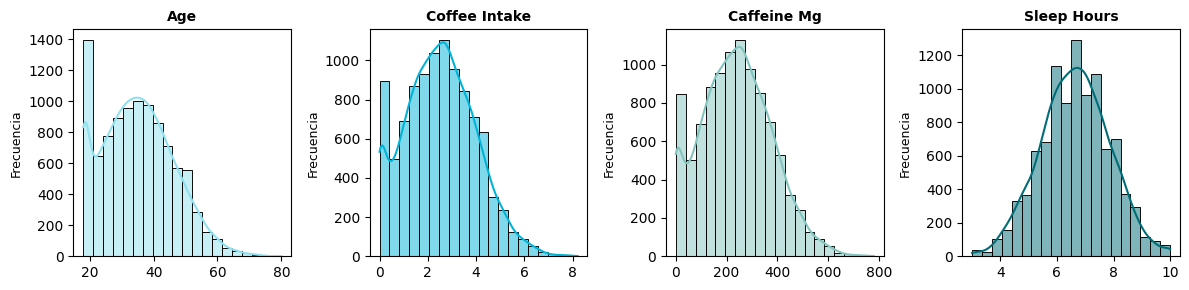

In [ ]:
# ======== Histogramas==========

palette =["#90e0ef","#00b4d8","#83c5be", "#006d77"] #paleta personalizada

fig, axes = plt.subplots(1, len(variables_1), figsize=(12,3))

for current_idx, variable_1 in enumerate(variables_1):
    sns.histplot(df_coffee[variable_1], kde=True, bins=20,
                 color=palette[current_idx], edgecolor="black", ax=axes[current_idx])
    axes[current_idx].set_title(variable_1.replace("_", " ").title(),
                                fontsize=10, fontweight="bold")
    axes[current_idx].set_xlabel("")
    axes[current_idx].set_ylabel("Frecuencia", fontsize=9)

plt.tight_layout()
plt.show()


**Interpretación histogramas**

Se realiza la interpretación para cada variable por separado

*   **Edad** [`age`]:La variable muestra un sesgo positivo leve (cola hacia la derecha), con una alta concentración de individuos jóvenes entre 18 y 30 años. El primer intervalo (aprox. 18–21 años) concentra una proporción particularmente elevada, lo que refuerza lo observado en el análisis de la moda (sobre-representación de este grupo). No hay evidencia clara de dos subgrupos diferenciados —aunque el primer intervalo podría dar esa impresión—; más bien, el histograma muestra una distribución continua, con frecuencia moderada en edades intermedias (25–40 años) y una cola extendida hacia edades mayores, lo que refleja una población mayoritariamente joven con escasa representación de adultos mayores.

*   **Consumo o ingesta de café** [`coffe_intake`]: El consumo diario de café (tazas/día) presenta un sesgo positivo, con predominio de valores bajos. La mayoría de los individuos consume entre 1 y 3 tazas por día, mientras que los consumos elevados son poco frecuentes. El primer bin, con valores muy bajos o nulos, también es notable, reflejando la presencia de individuos con consumo ocasional o inexistente. Esta acumulación en los valores bajos acentúa la asimetría de la distribución, fenómeno ya observado en el análisis descriptivo tabular y en la moda.

*   **Cafeina en mg** [`caffeine_mg`]: La distribución del consumo de cafeína, expresado en miligramos, mantiene el mismo patrón que la variable anterior: sesgo positivo con predominio de valores bajos a moderados (alrededor de 100–300 mg) y una menor frecuencia de consumos extremos. Se distingue también la presencia de un grupo de no consumidores, lo que refuerza la posible estructura bimodal de esta variable. Esta subpoblación ya se había observado previamente en el análisis descriptivo y en la moda.

*   **Horas de sueño** [`sleep_hours`]: Es la variable con la forma más cercana a una distribución normal. Se observa simetría alrededor de 6–7 horas diarias, donde se concentra la mayoría de la población. Los extremos —menos de 4 o más de 9 horas— son poco frecuentes, indicando una distribución estable y homogénea del patrón de sueño.








In [ ]:
#segundo grupo de variables
variables_2 = ['bmi', 'heart_rate', 'physical_activity_hours' ]

len(variables_2)

3

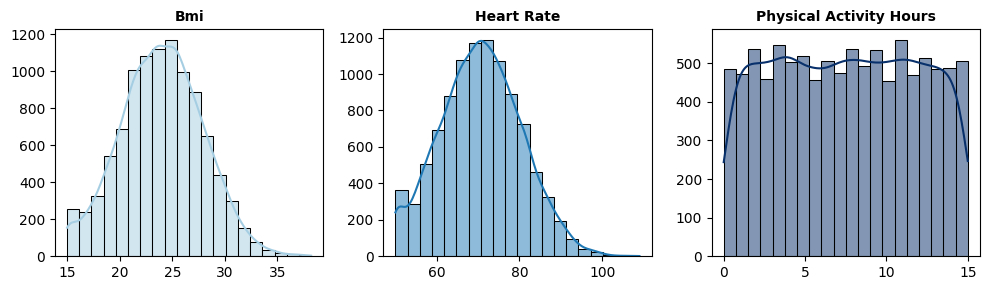

In [ ]:
# ======== Histogramas==========

palette = ["#a6cee3", "#1f78b4", "#08306b"] #paleta personalizada
fig, axes = plt.subplots(1, len(variables_2), figsize=(10,3))

for current_idx, variable_2 in enumerate(variables_2):
    sns.histplot(df_coffee[variable_2], kde=True, bins=20,
                 color=palette[current_idx], edgecolor="black", ax=axes[current_idx])
    axes[current_idx].set_title(variable_2.replace("_", " ").title(),
                                fontsize=10, fontweight="bold")
    axes[current_idx].set_xlabel("")
    axes[current_idx].set_ylabel("")

plt.tight_layout()
plt.show()

**Interpretación histograma**:

*   **Indice de masa corporal** [`bmi`] presenta una distribución aproximadamente normal, con leve sesgo positivo. Predominan valores entre 20 y 30 con una tendencia central entre 24-25 , correspondientes a rangos compatibles con peso normal y sobrepeso leve. Esto no condice con la moda calculada (15) lo que sugiere que esta útima podría corresponder a un valor atípico o error de registro, ya que no coincide con la tendencia general observada.
*   **Frecuencia cardíaca en reposo** [`heart_rate`]:muestra una distribución cercana a la normal, centrada en torno a 70 lpm y con leve sesgo positivo. La mayoría de los valores se ubican dentro de los rangos fisiológicos considerados normales.
*   **Horas de actividad física** [`physical_activity_hours`] una distribución relativamente homogénea, con valores que se extienden entre 0 y 15 horas semanales. No se observa un rango claramente predominante, aunque la leve concentración hacia valores bajos sugiere una ligera asimetría positiva. Esto concurda con lo observado en tabla de descripción inicial.











######**5.3.1.1.3 Medidas de asimetria y curtosis**


---

Puesto que tanto a nivel de tabla - numérico- como gráfico se observó la presencia de asimetria, se decide calcular la medidas de asimetria y curtosis.

Se sigue con la separación que se realizó para los histogramas en variables_1 y variables_2, solo para poder relaiconarlo mejor con los gráficos.

In [ ]:
# Calcular asimetría y curtosis
asimetria = [skew(df_coffee[var].dropna()) for var in variables_1]
kurtosis_ = [kurtosis(df_coffee[var].dropna(), fisher=False) for var in variables_1]  # fisher=False, refiere al uso de escala "normal = 3"

# Crear tabla resumen primeras variables
forma_table = pd.DataFrame({
    "Asimetría": asimetria,
    "Curtosis": kurtosis_
}, index=variables_1).round(2)

forma_table

,Asimetría,Curtosis
age,0.36,2.65
coffee_intake,0.26,2.72
caffeine_mg,0.26,2.72
sleep_hours,-0.02,2.86


In [ ]:
# Calcular asimetría y curtosis
asimetria_2 = [skew(df_coffee[var].dropna()) for var in variables_2]
kurtosis_2 = [kurtosis(df_coffee[var].dropna(), fisher=False) for var in variables_2]  # fisher=False, refiere al uso de escala "normal = 3"

# Crear tabla resumen
forma_table_2 = pd.DataFrame({
    "Asimetría": asimetria_2,
    "Curtosis": kurtosis_2
}, index=variables_2).round(2)

forma_table_2

,Asimetría,Curtosis
bmi,0.05,2.83
heart_rate,0.10,2.74
physical_activity_hours,0.00,1.80


**Interpretación asimetría y curtosis**


*   **Edad**[`age`]: se confirma numéricamente lo observado de forma gráfica: existe un sesgo leve hacia la derecha (asimetría positiva = 0,36), lo que indica una mayor concentración de individuos jóvenes y algunos valores aislados de mayor edad que alargan la cola de la distribución. El valor de curtosis cercano a 3 (2,65) sugiere una concentración moderada de valores en torno al centro, similar a una distribución normal aunque algo más aplanada.
*  **Consumo de café o cafeína** [`coffee_intake`][`caffeine_mg]`: Ambas variables presentan una asimetría positiva leve (0,26), evidenciando que la mayoría de los individuos consumen pocas o ninguna taza de café (o miligramos de cafeína), mientras que un grupo reducido muestra consumos más altos, lo que genera una cola hacia la derecha. La curtosis cercana a 3 (2,72 en ambos casos) indica una concentración de valores centrales semejante a la distribución normal, lo que coincide con la forma observada en los histogramas.
*   **Horas de sueño** [`sleep_hours`]: La asimetría cercana a cero (-0,02) refleja una distribución prácticamente simétrica, donde la mayoría de los individuos duerme un número de horas similar (media similar a mediana). La curtosis (2,86) también se aproxima al valor teórico de 3, indicando una distribución muy parecida a la normal, sin colas pesadas ni concentración excesiva de valores centrales.
*  **Indice de masa corporal** [`bmi`]: La variable presenta una asimetría prácticamente nula (0,05), lo que indica una distribución simétrica respecto al valor central. El valor de curtosis (2,83) se aproxima al de una distribución normal (3), lo que sugiere una dispersión moderada y sin colas pesadas. En conjunto, el BMI se distribuye de forma equilibrada, sin concentraciones extremas ni valores atípicos significativos. Esto resulta concordante con el histograma, aunque no con la moda calculada, que podría corresponder a un valor atípico o error de registro.
*   **Frecuencia cardíaca en reposo** [`heart_rate`]: Con una asimetría leve y positiva (0,10), la distribución muestra una muy ligera inclinación hacia la derecha, aunque prácticamente imperceptible. La curtosis de 2,74, cercana a 3, indica una forma casi normal, con valores centrados y sin presencia marcada de extremos. La frecuencia cardíaca, por tanto, se mantiene estable dentro de los rangos fisiológicos esperables para la población general, concordante con los análisis previos.
*  **Horas de actividad física semanales** [`physical_activity_hours`]: La asimetría es prácticamente nula (0,00), lo que evidencia una distribución perfectamente simétrica. Sin embargo, la curtosis es más baja (1,80), lo que sugiere una distribución más aplanada, con una dispersión mayor y menos concentración en torno al valor medio. Esto refuerza lo observado en el histograma, donde la distribución mostraba un patrón relativamente uniforme, sin predominio de ningún rango particular.








######**5.3.1.1.4 Detección de valores atípicos (Outliers)**

Antes de proseguir con el analisis bi y multivariado, se realiza la detección de valores atipico de manera univariada para luego ser tratados en su apartado correspondiente. El objetivo de este apartado es solo conocer si existen o no.


A los fines de una mejor visualizacion gráfica se separan en 2 las variable a analizar como en los histogramas.


In [ ]:
print(variables_1)

['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours']


In [ ]:
print(variables_2)

['bmi', 'heart_rate', 'physical_activity_hours']


Se realizan Boxplot, interactivos utilizando `Ployly` para evaluar de forma visual la presencia de valores atípicos.

In [ ]:

# Primer grupo de variables
variables_1 = ['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours']

# Paleta de colores personalizada
palette = ["#90e0ef", "#00b4d8", "#83c5be", "#006d77"]

# Crear subplots (1 fila, 4 columnas)
fig = make_subplots(rows=1, cols=len(variables_1))

# Agregar un boxplot por variable
for i, var in enumerate(variables_1):
    fig.add_trace(
    go.Box(
        y=df_coffee[var],
        name=var.replace('_', ' ').title(),
        marker_color=palette[i],
        boxmean='sd'
    ),
    row=1, col=i+1
)

# Ajustes generales
fig.update_layout(
    height=400,
    width=1000,
    showlegend=False,
    # title_text="Distribución de variables numéricas",
    title_x=0.5,
    template="plotly_white"
)

fig.show()


**Interpretación boxplot**

*   **Edad** [`age`]: se observan varios valores atípicos hacia el extremo superior, correspondientes a edades más avanzadas (mayores de 70 años, predominantemente). Considerando lo analizado previamente —donde se evidenció un claro predominio de jóvenes adultos (moda, histograma, asimetría)—, estos valores atípicos podrían deberse a un desbalance en la muestra respecto a las edades mayores, es decir, pocas personas mayores dentro de un grupo mayormente joven. No hay outliers inferiores, lo que sugiere un límite natural en los 18 años (edad mínima en la muestra).
*   **Consumo de café** [`coffee_intake`]: al igual que la edad, presenta varios outliers superiores, correspondientes a individuos con un consumo muy alto (más de 6–8 tazas diarias), poco frecuentes en la población general. No se observan valores imposibles o negativos, por lo que estos casos reflejan simplemente un grupo reducido con hábitos de consumo intensivo.
*   **Cafeína en miligramos** [`caffeine_mg`]: muestra un patrón muy similar al del consumo de café, con outliers superiores que representan altas dosis de cafeína. Dado que una variable deriva de la otra, resulta coherente que la variable derivada (mg) conserve los mismos valores extremos que la variable base (tazas).
*   **Horas de sueño** [`sleep_hours`]: a diferencia de las anteriores, esta variable presenta pocos outliers y en el extremo inferior, indicando individuos con muy pocas horas de sueño (alrededor de 3–4 horas). Este patrón refleja una minoría con privación de sueño, pero no hay valores extremos superiores, lo que sugiere que el exceso de sueño (>9–10 h) es poco común en esta muestra, en concordancia conl o observado en los analisis realizados hasta el momento.

In [ ]:

# Segundo grupo de variables
variables_2 = ['bmi', 'heart_rate', 'physical_activity_hours']

# Paleta de colores personalizada
palette = ["#a6cee3", "#1f78b4", "#08306b"]

# Crear subplots (1 fila, 3 columnas)
fig = make_subplots(rows=1, cols=len(variables_2))

# Agregar un boxplot por variable
for i, var in enumerate(variables_2):
    fig.add_trace(
        go.Box(
            y=df_coffee[var],
            name=var.replace('_', ' ').title(),
            marker_color=palette[i],
            boxmean='sd'  # muestra la media y la desviación estándar
        ),
        row=1, col=i+1
    )

# Ajustes generales
fig.update_layout(
    height=400,
    width=900,
    showlegend=False,
    # title_text="Distribución de variables fisiológicas",
    title_x=0.5,
    template="plotly_white"
)

fig.show()


**Interpretación boxplot**


*   **Indice de masa corporal** [`bmi`]: se observan varios valores atípicos en el extremo superior, correspondientes a individuos con grados elevados de sobrepeso u obesidad. Estos valores son fisiológicamente posibles, por lo que no se tratarían de errores de registro, sino de casos reales que representan una minoría dentro del conjunto muestral. Este comportamiento concuerda con lo observado en el análisis descriptivo inicial.
*   **Frecuencia cardíaca en reposo** [`heart_rate`]: presenta una cantidad moderada de valores atípicos en el rango superior, lo que indica la presencia de algunos individuos con frecuencia cardíaca más elevada de lo habitual. La mayoría de los casos se concentra dentro de los rangos fisiológicos normales, mientras que los outliers podrían corresponder a situaciones que elevan temporalmente la frecuencia cardíaca (por ejemplo, estrés, medicación o actividad reciente).
*   **Actividad física en horas** [`physical_activity_hours`]: no se observan valores atípicos. La distribución es amplia y homogénea, reflejando la variabilidad natural en los niveles de actividad física entre los participantes. No hay indicios de valores extremos ni errores de registro.

Para justificar los outliers se realiza el cálculo de los rangos intrcuartilos (IQR de sus siglas en inglés), de esta forma se pueden observar en forma numérica lo observado en el boxplot de forma gráfica, establaciendo los limites a partir de los cuales se puede considerar un dato atípico para una variable.

In [ ]:

variables = ['age', 'coffee_intake', 'caffeine_mg', 'sleep_hours',
               'bmi', 'heart_rate', 'physical_activity_hours']

iqr_table = pd.DataFrame({
    'Q1': df_coffee[variables].quantile(0.25),
    'Median': df_coffee[variables].median(),
    'Q3': df_coffee[variables].quantile(0.75)
})
iqr_table['IQR'] = iqr_table['Q3'] - iqr_table['Q1']
iqr_table['Límite inferior'] = iqr_table['Q1'] - 1.5 * iqr_table['IQR']
iqr_table['Límite superior'] = iqr_table['Q3'] + 1.5 * iqr_table['IQR']

iqr_table.round(2)


,Q1,Median,Q3,IQR,Límite inferior,Límite superior
age,26.00,34.0,43.00,17.00,0.50,68.50
coffee_intake,1.50,2.5,3.50,2.00,-1.50,6.50
caffeine_mg,138.75,235.4,332.02,193.27,-151.16,621.94
sleep_hours,5.80,6.6,7.50,1.70,3.25,10.05
bmi,21.30,24.0,26.60,5.30,13.35,34.55
heart_rate,64.00,71.0,77.00,13.00,44.50,96.50
physical_activity_hours,3.70,7.5,11.20,7.50,-7.55,22.45


**Interpretación tabla outliers**

De acuerdo con los límites calculados, se consideran valores atípicos para esta población aquellos individuos que presentan alguna de las siguientes características:

*   Edad superior a **68,5** años.
*   Consumo de café mayor a **6,5**tazas diarias o una ingesta de cafeína superior a **621,9** mg.
*   Horas de sueño inferiores a **3,25** horas diarias, lo que representa casos de privación severa de sueño.
*   Índice de masa corporal (BMI) superior a **34,55**, correspondiente a grados de obesidad.
*   Frecuencia cardíaca en reposo superior a **96,5** lpm, posiblemente asociada a factores como estrés, medicación o condiciones fisiológicas particulares.
*   Actividad física semanal superior a **22,45** horas, equivalente a más de 3 horas diarias, un patrón poco frecuente dentro de la muestra.

La única variable que no presenta valores atípicos según este análisis de rango intecuartilico (IQR) es`physical_activity_hours`, ya que ningún dato supera el limite superior de 22,45 horas.

NOTA: aquellas variables cuyo rango inicia en cero (`coffe_intake`, `caffeine_mg`, `physical_activity_hours`), presentan limites inferiores poco probales por ser negativo. Estos no se consideran, y no se interpreta para la detección; en la práctica, la evaluación de outliers recae solo en la cola superior.


#####**5.3.1.2 Variables categóricas**

######**5.3.1.2.1 Descripción general**

Se trabaja sobre las siguiente variables categóricas, definidas en la tipificación, describiendo cuales son y que representan. Si bien se las introdujo en el apartado de diccionario de variables (4.2), se las vuelve a mencionar para poder verlas agrupupadas.

In [ ]:
print("Categóricas:", categorical_cols)

Categóricas: ['gender', 'country', 'sleep_quality', 'stress_level', 'health_issues', 'occupation', 'smoking', 'alcohol_consumption']


In [ ]:
# Se eliminan duplicados por si alguna ya estaba incluida
categorical_cols= list(set(categorical_cols))
print("Categóricas:", categorical_cols)

Categóricas: ['occupation', 'country', 'sleep_quality', 'health_issues', 'alcohol_consumption', 'stress_level', 'gender', 'smoking']


Se separa en tipo de variable categórica, y las categorias que representan


*  [`gender`]: nominal; Valores : M, F, O
*  [`country`]: nominal; nombre de 20 paises. Ver graficos posteriores.
*  [`sleep_quality`]: ordinal; Valores: Poor, Fair, Good, Excellent.
*  [`stress_level`]: ordinal; Valores: Low, Medium , High.
*  [`health_issues`]: ordinal; Valores: None, Mild, Moderate, Severe.
*  [`occupation`]: nominal; Valores: Office, Other, Student, Healthcare, Service.
*  [`smoking`]: dummy o binaria; Valores : 0 = No, 1 = Yes
*  [`alcohol_consumption`]: dummy o binaria; Valores : 0 = No, 1 = Yes


######**5.3.1.2.2 Visualizaciones de distribución**

Se decide analizar utilizando grafico de barras las variables '`country`', '`sleep_quality`', '`stress_level`', '`health_issues`', '`occupation`'. Se realizan por separado.

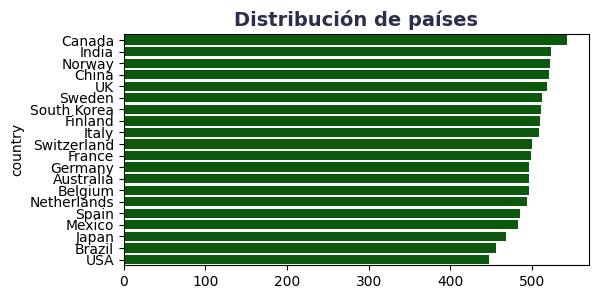

In [ ]:
#cuenta la frecuancia de personas de la población segun su pais
var = 'country'
counts = df_coffee[var].value_counts().rename_axis(var).reset_index(name='count')

# Ordena países según su frecuencia
order = counts[var].tolist()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(6,3))
sns.barplot(ax=ax, data=counts, x='count', y=var, order=order, color="darkgreen")
ax.set_xlabel("")
ax.set_title(
    'Distribución de países',
    fontsize=14,
    fontweight='bold',
    color='#2d2e4b'
)

plt.show()


**Interpretación**

se observa que la población analizada proviene de distintos continentes, la distribución por país es bastante homogénea, no se observan diferencias marcadas en la cantidad de individuos por categoría, lo cual sugiere que la muestra está balanceada en este aspecto.

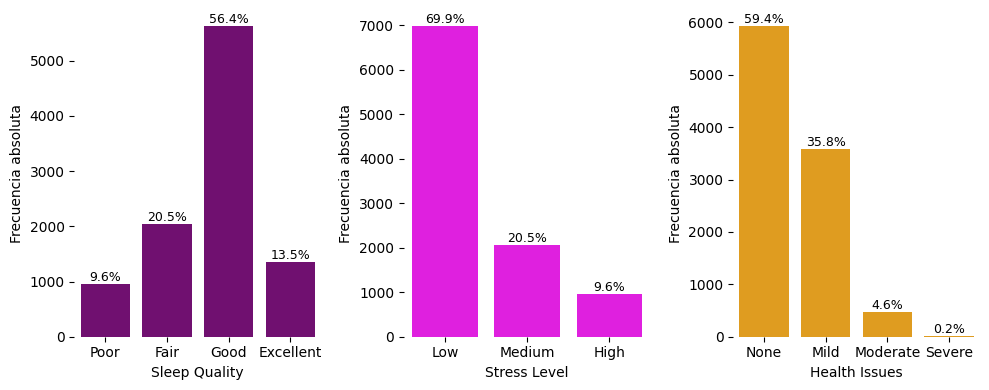

In [ ]:
# Variables categóricas
cat_vars = ["sleep_quality", "stress_level", "health_issues"]

# Orden lógico de las categorías
orders = {
    "sleep_quality": [ "Poor", "Fair", "Good", "Excellent"],
    "stress_level": ["Low", "Medium", "High"],
    "health_issues": ["None", "Mild", "Moderate", "Severe"]
}

# Colores personalizados (uno por cada variable)
custom_colors = ["purple", "magenta", "orange"]

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(10,4))

for i, col in enumerate(cat_vars):
    ax = sns.countplot(
        data=df_coffee,
        x=col,
        order=orders[col],
        color=custom_colors[i],
        ax=axes[i]
    )

    sns.despine(ax=ax, left=True, bottom=True)
    ax.set_facecolor("none")
    ax.figure.set_facecolor("none")

    # Porcentajes
    total = len(df_coffee)
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color="black")

    ax.set_ylabel("Frecuencia absoluta")
    ax.set_xlabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()



Para la variable` health_issues`, se realiza la tabla de freciancia absoluta y porcentajes para observar la representación de cada categoria, enfocado mas que nada en la severa donde el porcentaje es muy bajo.

In [ ]:
df_coffee["health_issues"].value_counts().to_frame("Frecuencia").assign(
    Porcentaje=lambda x: x["Frecuencia"] / x["Frecuencia"].sum() * 100
)

,Frecuencia,Porcentaje
health_issues,,
None,5941,59.41
Mild,3579,35.79
Moderate,463,4.63
Severe,17,0.17


**Interpretación**

*  **Calidad de sueño** [`sleep_quality`]: la mayor parte de la población presenta una buena calidad de sueño (‘Good’). En contraste, una minoría relativamente pequeña presenta una calidad de sueño baja o pobre (‘Poor’), mientras que las categorías ‘Fair’ y ‘Excellent’ muestran frecuencias intermedias.
*  **Nivel de estres** [`stress_level`]: Aproximadamente el 70% de la población refiere bajo nivel de estrés. Un grupo más reducido manifiesta niveles moderados y solo una pequeña proporción reporta niveles altos de estrés.
*  **Problemas de salud** [`health_issues`]: Si bien una elevada proporción de la población no presentó problemas de salud, un 35.8%  si presentó  problemas de salud pero leves, mientras que la proporción de aquellos con problemas moderados (4.6%)y severos (0.2%) fue muy baja. Esto se puede deber -como se observa en la tabla- en especial aquellos con problemas severos, por una falta de representación, con respecto a los demás categorias.

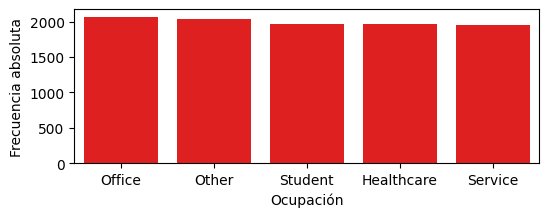

In [ ]:
plt.figure(figsize=(6,2))
sns.countplot(data=df_coffee,x ='occupation', order=df_coffee["occupation"].value_counts().index,  color="red")
plt.xlabel("Ocupación")
plt.ylabel("Frecuencia absoluta")
plt.show()

In [ ]:
df_coffee["occupation"].value_counts().to_frame("Frecuencia").assign(
    Porcentaje=lambda x: x["Frecuencia"] / x["Frecuencia"].sum() * 100
)

,Frecuencia,Porcentaje
occupation,,
Office,2073,20.73
Other,2038,20.38
Student,1968,19.68
Healthcare,1964,19.64
Service,1957,19.57


**Interpretación**

 Como se puede observar en el gráfico de barras y en la tabla de frecuencias y porcentaje, la distribución por ocupación es bastante homogénea, no se observan diferencias marcadas en la cantidad de individuos por categoría, lo cual sugiere que la muestra está balanceada en este aspecto.

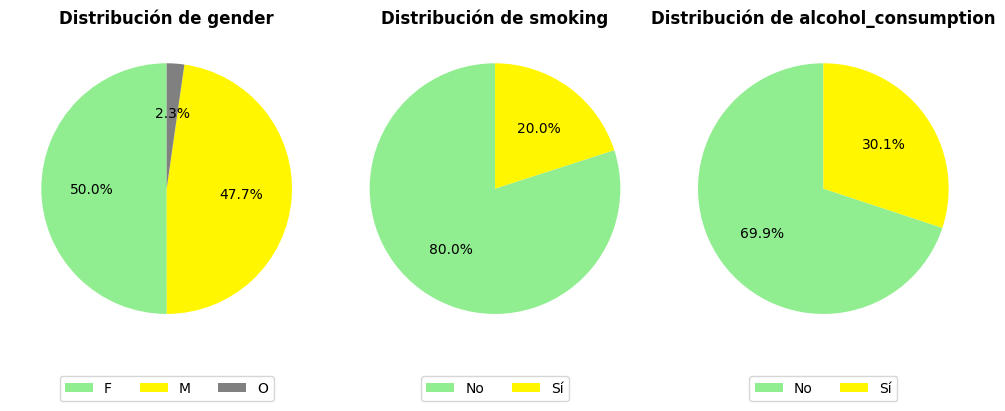

In [ ]:
# ===== PIECHART =====

#Variables a las cuales se les realizara el gráfico
pie_vars = ['gender', 'smoking', 'alcohol_consumption']

# Colores personalizados
custom_colors = ["lightgreen", "#FFF600", "gray"]

# Diccionario para mapear etiquetas
label_map = {
    "smoking": {0: "No", 1: "Sí"},
    "alcohol_consumption": {0: "No", 1: "Sí"},
  }

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, col in enumerate(pie_vars):
    counts = df_coffee[col].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_colors[:len(counts)]
    )

    # Mapear etiquetas según la variable
    labels = [label_map.get(col, {}).get(val, val) for val in counts.index]

    # Título
    axes[i].set_title(f"Distribución de {col}", fontsize=12, fontweight="bold")

    # Leyenda con etiquetas custom
    axes[i].legend(
        wedges, labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.2),
        ncol=len(counts)
    )

plt.tight_layout()
plt.show()


**Interpretacíon**:

*   **Género** [gender]: La población se encuentra balanceada entre los géneros femenino y masculino, con una leve predominancia femenina (50% vs. 47,7%). Además, se observa una proporción muy pequeña (2,3%) que se identifica con otro género.
*   **Tabaquismo** [smoking]: La mayoría de la población no fuma (80%), mientras que solo el 20% refiere ser fumadora.
*   **Consumo de alcohol** [alcohol_consumption]:Cerca de un 70% de la población no consume alcohol, frente a un 30% que sí lo hace.




---

####**5.3.2 Resúmen de análisis univariado**


---



Se realiza un resúmen del análisis univariado para evaluar que variables contrastar en los proximos análisis (bi y multivariado), en base al planteo de hipotesis.

#####**5.3.2.1 Resumen del análisis univariado de variables numéricas**

Se realiza el resumen de forma individual para cada variable numérica


*   **Edad**[`age`]: La distribución de edad muestra un s**esgo positivo leve**, con una **marcada concentración de individuos jóvenes** entre **18 y 30 años** y un valor **modal en 18 años**, lo que sugiere una **sobre-representación de jóvenes adultos**. A medida que aumenta la edad, la frecuencia disminuye gradualmente y se forma una **cola extendida hacia valores mayore**s, reflejando una **menor proporción de adultos mayores**. Los indicadores numéricos respaldan este patrón: una **asimetría positiva de 0.36** y una **curtosis de 2.65** describen una distribución próxima a la normal, aunque algo más aplanada. En los boxplots se observan **valores atípicos superiores** correspondientes a personas mayores de **68.5 años**, plausibles pero poco frecuentes dentro de una muestra mayoritariamente joven. No se detectan outliers inferiores, dado el límite natural en **18 años**.

*   **Consumo de café**[`coffe_intake`]: Las variables relacionadas con el consumo de café y cafeína muestran una **alta dispersión**, con valores **muy heterogéneos** y algunos casos extremos. El consumo diario de café presenta una **leve asimetría positiva**: la mayoría de los individuos toma entre una y tres tazas por día, mientras que los **consumos elevados son poco frecuentes**. Se destaca un grupo con **valores nulos o muy bajos**, correspondiente a personas que no consumen café, lo que incrementa la concentración en el extremo inferior. Los valores máximos superan ampliamente el percentil 90, indicando la **presencia de outliers** —a partir de aproximadamente **6.5 tazas diarias**— que representan a un grupo reducido de consumidores intensivos. En conjunto, ambas variables mantienen una **forma unimodal con curtosis cercana a la normal**, confirmando la concentración de la mayoría de los casos en niveles bajos o moderados de consumo.

*   **Cafeína en miligramos**[`caffeine_mg`]: Las variables relacionadas con el consumo de cafeína muestran una **elevada dispersión**, con valores máximos muy alejados del percentil 90 y **coeficientes de variación altos**, lo que refleja una **marcada heterogeneidad** dentro de la muestra. Ambas presentan una **leve asimetría positiva**: la mayoría de los individuos registra consumos bajos o nulos, mientras que un grupo reducido alcanza valores elevados, generando una cola hacia la derecha. La curtosis cercana a 3 (aprox. 2.7) sugiere una concentración de casos en torno a los valores centrales, compatible con una forma de **distribución similar a la normal**. El consumo de cafeína (mg) reproduce el patrón observado en el número de tazas diarias, ya que deriva directamente de esta variable; por ello, conserva los mismos valores extremos y outliers superiores, identificados a partir de ingestas mayores a **621.9 mg**.

*  **Horas de sueño** [`sleep_hours`]: La variable horas de sueño presenta una distribución prácticamente simétrica, con valores concentrados entre 6 y 7 horas diarias, donde se ubica la media y la mediana (asimetría = –0.02; curtosis = 2.86). Aproximadamente el 60% de la población duerme entre 3 y 7 horas, lo que sugiere una tendencia general hacia la privación de sueño. Los valores extremos son poco frecuentes y se concentran en el extremo inferior, correspondientes a individuos con menos de 3.25 horas diarias, considerados outliers por representar casos de privación severa. No se observan valores anómalos superiores, lo que indica que el exceso de sueño (>9–10 h) es poco común. En conjunto, la variable muestra un comportamiento estable y cercano a la distribución normal, reflejando un patrón homogéneo en la población.

*   **Indice de masa corporal**[`bmi`]: La variable índice de masa corporal (BMI) presenta una distribución aproximadamente normal, con leve sesgo positivo y valores concentrados entre 20 y 30, correspondientes a rangos compatibles con peso normal y sobrepeso leve. La asimetría prácticamente nula (0.05) y la curtosis cercana a 3 (2.83) indican una distribución equilibrada, sin colas marcadas. Entre los percentiles 10 y 60, alrededor del 50–60% de la población se ubica dentro del rango saludable. Se detecta un valor modal atípico (15.0), probablemente asociado a un registro extremo o error de carga, ya que no coincide con la tendencia general observada. En el extremo superior se identifican outliers a partir de valores mayores a 34.55, correspondientes a casos de obesidad; estos resultan fisiológicamente plausibles y reflejan una minoría dentro de la muestra. En conjunto, el BMI muestra una distribución estable y coherente con los patrones descriptivos previos.
*   **Frecuencia cardíaca en reposo** [`heart_rate`]: La variable frecuencia cardíaca en reposo presenta una distribución cercana a la normal, centrada en torno a 70 lpm, valor que coincide con el rango fisiológico habitual. Se observa una leve asimetría positiva (0.10) y una curtosis de 2.74, ambas coherentes con una forma de distribución prácticamente simétrica y sin colas marcadas. La mayoría de los individuos se encuentra dentro de los valores normales, lo que indica un patrón estable en la población. Se identifican algunos outliers en el extremo superior —a partir de 96.5 lpm— que podrían corresponder a casos con frecuencia cardíaca más elevada por factores circunstanciales como estrés, medicación o actividad reciente. En conjunto, la variable muestra una dispersión moderada y un comportamiento fisiológicamente esperable.
*   **Horas de actividad física** [`physical_activity_hours`]: La variable horas de actividad física semanal muestra una alta dispersión, confirmada por desviaciones estándar y coeficientes de variación elevados. La distribución es amplia y relativamente homogénea, con valores que se extienden entre 0 y 15 horas semanales y una ligera asimetría positiva, reflejando una mayor concentración de individuos con niveles bajos de actividad. La asimetría cercana a cero (0.00) y la curtosis baja (1.80) indican una forma aplanada y uniforme, sin una tendencia claramente dominante. No se observan valores extremos evidentes, aunque se identifican como outliers los casos con más de 22.45 horas semanales, equivalentes a más de 3 horas diarias, un patrón infrecuente dentro de la muestra. En conjunto, la variable refleja una distribución equilibrada y coherente con la variabilidad esperada en los niveles de actividad física.




#####**5.3.2.2 Resumen del análisis univariado de variables categóricas**


1. La mayoría refiere buena **calidad de sueño** (Good) y bajo **nivel de estrés**, aunque un subgrupo minoritario reporta pobre calidad de sueño y estrés alto, que podrían tener efectos relevantes en las horas de sueño y la salud general.
2. Como se pudo observar, la muestra se encuentra balanceda en términos de **género**, **ocupación** y **país**, esto evita sesgos de representacíon de estas variables.   
3.  La mayoría de la población no fuma (80%) ni consume alcohol (70%), lo que define grupos minoritarios de interés para contrastar en relación con variables de salud.   
4.  En cuanto a salud percibida, predominan los individuos sin problemas o con problemas leves, mientras que los casos moderados o severos son poco frecuentes.


Nota: Las variables categóricas género, ocupación y país presentaron distribuciones equilibradas en la población analizada, sin predominio de categorías ni diferencias evidentes en las variables principales. Por este motivo, se decidió no utilizarlas inicialmente para la segmentación en los análisis bivariados, aunque se mantuvieron como factores exploratorios en caso de que en dichos análisis se observaran asociaciones o diferencias significativas.


###**5.4. Hipótesis**

Respecto a la variable target y con los resultados observados del análisis univariado surgen los siguientes interrogante o relaciones a testear:

1.  ¿Existe relación entre las horas de sueño y la percepción de la calidad del mismo?
2. ¿El mayor consumo de cafeína, se asocia a menos horas de sueño?
3. ¿El mayor consumo de cafeína,  se asocia a peor calidad de sueño?
4.   ¿Existe relación entre la cantidad de horas de sueño y el nivel de estrés o problemas de salud o actividad física?
5.   ¿Existe algún efecto de la edad en relación a las horas de sueño?
6.   ¿¿Existen relaciones significativas entre las horas de sueño (`sleep_hours`) y las distintas características individuales ( hábitos, fisiología y demografía)?

Este útimo interrogante pretende establecer relaciones entre la variable target y el resto de las variables que no fueron testeadas, como base para la selección de predictores en el modelado posterior.

###**5.5 Análisis bivariado**

####*5.5.1 Horas de sueño [sleep_hours] (variable target) con calidad del sueño [sleep_quality] (numérica - categórica)*

Antes de comenzar a indagar en busca de relaciones de la variable target [sleep_hours] con otras variables de estilo de vida se decide evaluar cual es la relación entre esta y la calidad de sueño percibida [sleep_quality]. En este caso se busca la relación entre una variable numérica contínua y una variable categórica ordinal [slee_hours - sleep_quality].

Intenta responde al interrogante *1.  ¿Existe relación entre las horas de sueño y la percepción de la calidad del mismo?*

#####**5.5.1.1  Visualizaciones**

En primera instancia, se decide describir la relación entre ambas.  Esto permite poder comprender mejor los datos para luego visualizarlos gráficamente.

In [ ]:
# Descripción estadística básica de la relación

#orden en el que se deben leer
orden_calidad = ['Poor', 'Fair', 'Good', 'Excellent']

df_coffee['sleep_quality'] = pd.Categorical(
    df_coffee['sleep_quality'],
    categories=orden_calidad,
    ordered=True
)

tabla = (df_coffee
         .groupby('sleep_quality', observed=True)['sleep_hours']
         .describe()
         .reindex(orden_calidad)) #reindexo por el orden que quiero y defini al principio

# Redondeo
tabla = tabla.round(2)

tabla


,count,mean,std,min,25%,50%,75%,max
sleep_quality,,,,,,,,
Poor,961.0,4.45,0.46,3.0,4.2,4.6,4.8,5.0
Fair,2050.0,5.58,0.28,5.0,5.4,5.6,5.8,6.0
Good,5637.0,6.92,0.55,6.0,6.5,6.9,7.4,8.0
Excellent,1352.0,8.59,0.50,8.0,8.2,8.5,8.8,10.0


**Interpretación**

Se puede observar que:

*   El grupo más representado (5637/10000) es aquel que percibe una buena (*Good*) calidad de sueño, mientras que el menos frecuente (961/10000) corresponde a quienes califican su descanso como pobre (*Poor*).
*  Los valores extremos identificados en el análisis univariado de `sleep_hours` se distribuyen de forma coherente con la calidad percibida: los mínimos (3 h) aparecen en *Poor*, y los máximos (10 h) en *Excellent*.
* Los individuos que reportan una calidad de sueño buena (Good) duermen en promedio 6,92 horas, lo que se aproxima a los valores mínimos considerados dentro del rango saludable de descanso para adultos (7–9 horas, según la bibliografía consultada).  
*   La menor dispersión (desviación estándar = 0.28) se observa en el grupo Fair, lo que sugiere que quienes perciben su sueño como regular duermen una cantidad de horas más homogénea. En contraste, Good muestra el mayor rango intercuartílico (Q3–Q1 = 7.4–6.5 = 0.9 h), indicando una mayor variabilidad dentro del grupo.
*   En términos de tendencia central, se observa una **relación positiva** entre la **cantidad de horas dormidas** y la percepción de la **calidad del sueño**: a mayor duración del sueño, mejor valoración subjetiva del mismo. Este patrón resulta esperable desde el punto de vista fisiológico y perceptivo y **responde parcialmente a la hipótesis planteada**, que proponía explorar la relación entre la duración del sueño y la percepción de su calidad.




Se utiliza la librería `Plotly`, que permite generar gráficos interactivos. En este caso se seleccionó el gráfico de violín, que combina la forma de una distribución con un boxplot interno y una representación de los datos individuales mediante puntos.
De esta manera, es posible visualizar simultáneamente la distribución de las horas de sueño en cada categoría de percepción de calidad, así como identificar la presencia de valores atípicos dentro de cada grupo.

In [ ]:
# ==== Violinplot Plotly ====

# Paleta personalizada: tonos entre púrpura y teal
custom_palette = [
    '#7b2cbf', #violeta oscuro
    '#9d4edd', #violeta claro
    '#2a9d8f', #verde teal-like
    '#006d77'] #verde teal

fig = px.violin(
    df_coffee,
    x='sleep_quality',
    y='sleep_hours',
    box=True,
    points='all', #de esta forma se ven todos en la barra lateral de cada violin
    color='sleep_quality',
    color_discrete_sequence=custom_palette,
    # title='Horas de sueño según calidad percibida'
)

fig.update_layout(
    width=1200,
    height=750,
    plot_bgcolor='white',
    title_font=dict(size=16, color='#2a2a2a'),
    xaxis_title='Calidad del sueño percibida',
    yaxis_title='Horas de sueño',
    xaxis=dict(categoryorder='array', categoryarray=['Poor', 'Fair', 'Good', 'Excellent'])
)

fig.show()



**Interpretación**

Se realizará según la calidad percibida de sueño:

*   **Pobre** (*Poor*): La forma del violín muestra una asimetría negativa (sesgo hacia la izquierda), reflejando una mayor concentración de valores en torno a las 4–4,5 horas de sueño y una cola que se extiende hacia valores más bajos (hasta 3 h). Se observan algunos puntos aislados en ese extremo inferior, que pueden considerarse valores atípicos. El rango intercuartílico (IQR) es moderado, lo que indica una dispersión media dentro del 50 % central de los datos. No obstante, la altura total de la caja sugiere cierta heterogeneidad en el grupo, en concordancia con el análisis descriptivo previo. La mediana se encuentra algo desplazada hacia el cuartil superior (Q3), reforzando la presencia de asimetría negativa. Finalmente, los puntos individuales evidencian una mayor concentración entre 4 y 5 horas de sueño, mientras que los valores entre 3 y 4 horas son menos frecuentes y más dispersos, lo que confirma un patrón de sueño corto y variable en quienes perciben su descanso como pobre.
*   **Regular** (*Fair*): La forma del violín muestra una distribución relativamente simétrica, con una leve asimetría negativa (sesgo hacia la izquierda), lo que indica que la mayoría de los valores se concentran en torno a las horas centrales del rango (5,4 a 6 h). No se observan valores extremos o atípicos. El rango intercuartílico (IQR) es reducido, lo que confirma una dispersión baja dentro del 50 % central de los datos. Este patrón concuerda con el análisis descriptivo previo, que mostró a este grupo como el de menor variabilidad en las horas de sueño. La mediana se ubica de manera central dentro de la caja, sugiriendo una distribución interna homogénea entre los cuartiles. Finalmente, la visualización de los puntos individuales (barras granulares laterales) refuerza la concentración de observaciones en torno a las 5–6 horas de sueño, sin grandes desviaciones verticales, lo que evidencia la consistencia interna del grupo que percibe su descanso como regular (Fair).
*   **Bueno** (*Good*): En el caso de los individuos que perciben su calidad de sueño como buena (Good), la distribución se muestra bastante simétrica y uniforme, sin sesgos marcados. Se aprecia una ligera expansión hacia la izquierda, correspondiente a una leve asimetría negativa, que indica una pequeña proporción de valores algo menores de sueño.No se observan valores extremos. El rango intercuartílico (IQR) es algo más elevado en comparación con los grupos Fair y Poor, lo que indica una mayor dispersión interna, tal como se anticipó en el análisis descriptivo previo. Sin embargo, la altura de la caja refleja que, pese a esta variabilidad, los valores se distribuyen de forma homogénea dentro del grupo. La mediana se ubica en torno a las 7 horas de sueño, coincidiendo con el inicio del rango considerado saludable para adultos (7–9 h). Los puntos individuales muestran que la mayoría de los casos se concentra entre 6,2 y 7,9 horas, por lo que, aun durmiendo ligeramente por debajo de lo recomendado, muchos individuos perciben su descanso como satisfactorio, lo que sugiere que la percepción de “buen sueño” podría estar influida también por factores cualitativos además de la cantidad de horas.
*   **Excelente** (*Excellent*): En el caso de los individuos que perciben su sueño como excelente (*Excellent*), la curva de densidad presenta una forma similar a la del grupo Poor, pero en sentido opuesto: muestra una asimetría positiva (sesgo hacia la derecha), con una cola que se extiende hacia las mayores horas de sueño. Se observan algunos valores extremos en ese extremo superior, coherentes con duraciones de hasta 10 horas. El rango intercuartílico (IQR) es moderado, lo que indica una dispersión interna media. Sin embargo, la altura de la caja sugiere que los valores se distribuyen de manera homogénea dentro del grupo, manteniendo una consistencia interna similar a la observada en Fair. La mediana se encuentra centrada dentro de la caja, lo que refuerza la idea de una distribución equilibrada entre los cuartiles. El bigote superior es más largo que el inferior, lo que visualmente evidencia la asimetría positiva. Finalmente, los puntos individuales (barras granulares) muestran una mayor concentración entre 8 y 8,6 horas de sueño, con una menor frecuencia y mayor dispersión entre 9,1 y 10 horas. Este patrón confirma la moderada dispersión del grupo y la presencia de valores atípicos en el extremo superior, consistentes con la percepción de un descanso excelente.


Analizando el grafico a nivel global:

De forma coherente con lo observado en la tabla descriptiva, los gráficos de violín evidencian una tendencia positiva entre las horas de sueño y la calidad percibida. Las medianas de horas de sueño aumentan progresivamente desde el grupo Poor hasta Excellent, reflejando que, a medida que las personas duermen más horas, mejor es la valoración subjetiva de la calidad de su descanso.

Este comportamiento visual refuerza la asociación ya señalada en el análisis bivariado y responde parcialmente a la hipótesis planteada, que proponía explorar la relación entre la cantidad de horas de sueño y la percepción de su calidad.


#####**5.5.1.2 Justificción estadística**

A partir del análisis descriptivo y gráfico se observa que, aunque la variable `sleep_hours` presenta una distribución global semejante a la normal, las distribuciones correspondientes a cada categoría de *sleep_quality *no cumplen dicho supuesto, mostrando asimetrías y diferencias en la dispersión.
Por esta razón, se optó por aplicar el test no paramétrico de *Kruskal–Wallis*, que permite evaluar si las horas de sueño difieren significativamente entre los distintos niveles de calidad percibida del sueño sin asumir normalidad ni homogeneidad de varianzas.

In [ ]:
grupos = [df_coffee.loc[df_coffee['sleep_quality'] == cat, 'sleep_hours']
          for cat in df_coffee['sleep_quality'].unique()]

stat, p = kruskal(*grupos)

print("\n--- Test de Kruskal–Wallis ---")
print(f"H-statistic: {stat:.3f}")
print(f"p-value: {p:.3f}")



--- Test de Kruskal–Wallis ---
H-statistic: 8080.595
p-value: 0.000


**Resultados**

El test de Kruskal–Wallis indicó diferencias estadísticamente significativas en las horas de sueño entre las distintas calidades de sueño percibidas (H = 8080.595, p < 0.001).

Del análisis anterior se observó que existen diferencias estadísticamente significativas en las horas de sueño entre las distintas calidades de sueño percibidas.
Para identificar entre qué grupos se presentan dichas diferencias, se aplicó un test post hoc de *Dunn* con corrección de *Holm*, que realiza comparaciones por pares entre las categorías. Se decide el ajuste de Holm por presentar disparuda en la cantidad de datos entre las distintas categorias de calidad de sueño, como se observó en el análisis descriptivo inicial.
Los resultados se presentan con una notación diferencial de significancia, donde los asteriscos indican el nivel de evidencia estadística:
* p < 0.05, ** p < 0.01, *** p < 0.001 y ns indica que la diferencia no es significativa.

In [ ]:
# Test de Dunn post hoc
dunn = sp.posthoc_dunn(
    df_coffee,
    val_col="sleep_hours",
    group_col="sleep_quality",
    p_adjust="holm"
)

# Redondeo a 3 decimales
dunn_rounded = dunn.round(3)

# Agregar asteriscos según significancia
def significance_marker(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    else:
        return "ns"  # no significativo

# Aplicar función a cada celda
dunn_styled = dunn_rounded.apply(lambda col: col.map(lambda x: f"{x:.3f} {significance_marker(x)}"))

print("\n--- Test de post hoc Dunn c/ajuste Holm---")
print("(p-valores ajustados con significancia):")
display(dunn_styled)


--- Test de post hoc Dunn c/ajuste Holm---
(p-valores ajustados con significancia):


,Poor,Fair,Good,Excellent
Poor,1.000 ns,0.000 ***,0.000 ***,0.000 ***
Fair,0.000 ***,1.000 ns,0.000 ***,0.000 ***
Good,0.000 ***,0.000 ***,1.000 ns,0.000 ***
Excellent,0.000 ***,0.000 ***,0.000 ***,1.000 ns


**Resultado**

El test post hoc de Dunn con corrección de Holm indicó diferencias estadísticamente significativas entre todas las categorías de sleep_quality (p-ajustado < 0.001 en todos los pares).
Esto confirma que las medianas de horas de sueño difieren entre cada nivel de calidad percibida, manteniendo el control del error tipo I bajo el ajuste de Holm.


---
#####**5.5.1.3 Conclusión**



---

*Los resultados muestran una relación positiva entre la cantidad de horas dormidas y la calidad del sueño percibida.
**A medida que aumenta la duración del sueño, las personas tienden a valorar su descanso como de mejor calidad.**
Esta tendencia se observa de forma consistente en los análisis descriptivos, en la visualización con gráficos de violín y en las pruebas estadísticas, donde se confirmaron diferencias significativas entre todos los niveles de calidad percibida.
**En conjunto, los hallazgos respaldan la hipótesis de que una mayor cantidad de horas de sueño se asocia con una mejor percepción del descanso**.*


---



####*5.5.2 Horas de sueño [sleep_hours] (variable target) con consumo de cafeína en mg [caffeine_mg] (numérica - numérica)*

#####**5.5.2.1  Visualizaciones**

Se busca determinar si existe una asociación entre la cantidad de cafeína ingerida (en mg) y las horas de sueño.
En esta etapa se analiza la relación entre dos variables numéricas: `sleep_hours` y `caffeine_mg`.


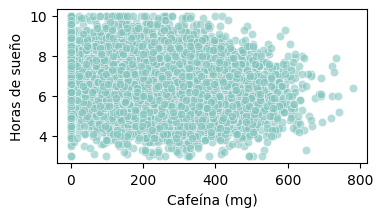

In [ ]:
#Scatterplot para evaluar relación entre las horas de sueño y los mg de cafeína consumidos
plt.figure(figsize=(4,2))
sns.scatterplot(
    data=df_coffee,
    x="caffeine_mg",
    y="sleep_hours",
    alpha=0.6,           # transparencia para evitar saturación
    color="#83c5be"
)
# plt.title("Relación entre cafeína (mg) y horas de sueño")
plt.xlabel("Cafeína (mg)")
plt.ylabel("Horas de sueño")
plt.show()

**Interpretación**

Lo primero que salta a la vista es que existe una gran cantidad de puntos concentrados en los valores bajos de cafeína (cerca de 0 mg).
Por lo tanto, no se observa relación clara entre cafeína (mg) y horas de sueño. Hay que evaluar si la precencia de esa gran proporción de no consumidores (sabemos de su existencia por el analisis univariado , representado por cafeína = 0 ) podrian influir en la relación entre estas varibles.

#####**5.5.2.2  Reformulación de hipótesis**

Dado que el valor cero representa a individuos que no consumen cafeína, su inclusión puede enmascarar patrones en los consumidores. Por ello, se decide evalúa por separador, consumidores de no conumidores.
Además, se decide reformular el segundo interrogante para este análisis, en 2 preguntas:

*a.   ¿Los consumidores de cafeína presentan un patrón de sueño distinto al de los no consumidores?*

*b.   Dentro de la poblacíon de consumidores ¿Existe una asociación entre mayor ingesta de mg de cafeína y menor cantidad de horas de sueño?*

Se procede de la siguiente manera

#####**5.5.2.3 Testeo de hipótesis *1.a* (numérica-numérica)**

Separacíon de las 2 subpoblaciones (consumidor y no consumidor)

In [ ]:
# Consumidores (cafeína > 0)
df_consumo = df_coffee[df_coffee['caffeine_mg'] > 0]
df_consumo.shape #se observa por cuantos datos esta compuesta

(9472, 15)

In [ ]:
# No consumidores (cafeína = 0)
df_no_consumo = df_coffee[df_coffee['caffeine_mg'] == 0]
df_no_consumo.shape #se observa por cuantos datos esta compuesta

(528, 15)

Se puede observar que existen 9472 consumidores de cafeína y 528 que no la consumen.

######**5.5.2.3.1 Visualizaciones hipótesis *2.a* (numérica-numérica)**

Se realizan scatterplot de cada subgrupo en busca de evaluar visualmente si existe o no relación.

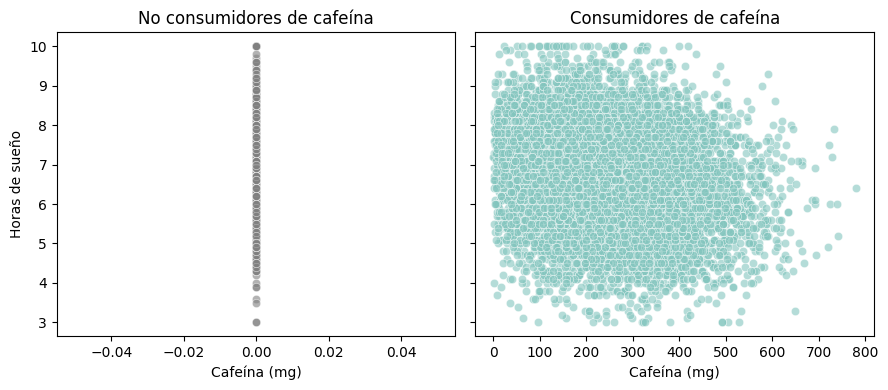

In [ ]:
# ==== Scatterplot ====

fig, axes = plt.subplots(1, 2, figsize=(9,4), sharey=True)

# Consumidores
sns.scatterplot(
    data=df_consumo, x="caffeine_mg", y="sleep_hours",
    alpha=0.6, color="#83c5be", ax=axes[1]
)
axes[1].set_title("Consumidores de cafeína")
axes[1].set_xlabel("Cafeína (mg)")
axes[1].set_ylabel("")

# No consumidores
sns.scatterplot(
    data=df_no_consumo, x="caffeine_mg", y="sleep_hours",
    alpha=0.6, color="gray", ax=axes[0]
)
axes[0].set_title("No consumidores de cafeína")
axes[0].set_xlabel("Cafeína (mg)")
axes[0].set_ylabel("Horas de sueño")

plt.tight_layout()
plt.show()

De esta forma se corrobora que existen estas dos poblaciones y que deber ser analizadas por separado. En los no consumidores al tratarse de punto alineados en el consumo nulo de cafeina, no tiene sentido analizarlos en scatterplot clásico. Mientras que el los consumidores no se observa un patron característico de relación, y su distribución es muy similar a la observada en población total.

Para complementar este análisis se puede realizar un violinplot transformando en binario el consumo de cafeina, de esta forma se podria dar respuesta a la hipotesis 2.a.

In [ ]:
#creación de variable binaria "consumo [si/no]"
df_coffee['consumo'] = df_coffee['caffeine_mg'].apply(lambda x: "No" if x == 0 else "Sí")

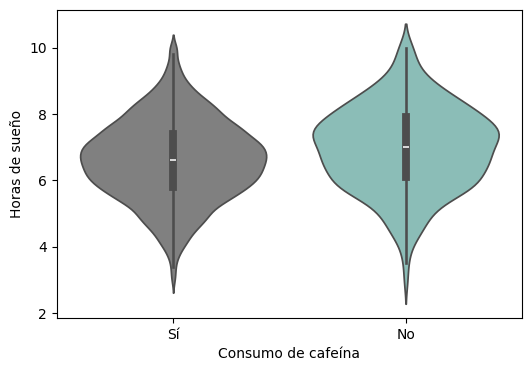

In [ ]:
# ==== Violinplot ====
plt.figure(figsize=(6,4))
sns.violinplot(
    data=df_coffee,
    x="consumo",
    y="sleep_hours",
    hue="consumo",
    palette=["gray","#83c5be"],
    legend=False,
    inner="box"
)
# plt.title("Horas de sueño según consumo de cafeína")
plt.xlabel("Consumo de cafeína")
plt.ylabel("Horas de sueño")
plt.show()

**Interpretación**:

A nivel gráfico, no se observan diferencias marcadas en el patrón de sueño entre quienes consumen y quienes no consumen cafeína.
Ambas distribuciones presentan una forma y un rango central similares, con medianas próximas a las 6–7 horas de sueño.
No obstante, el grupo de no consumidores muestra una dispersión ligeramente mayor y una leve asimetría negativa (concentrado hacia valores superiores de horas de sueño), lo que sugiere una mayor variabilidad en las horas de sueño dentro de este grupo.

######**5.5.2.3.2 Justificación estadística de hipótesis *1.a* (numérica-numérica)**

Se decide realizar un *test t de Student* para muestras independientes, ya que se busca evaluar si existen diferencias significativas en las medias de una variable numérica continua (sleep_hours) entre dos grupos independientes (consumidores de cafeína: “Sí” / “No”).
Dado que las muestras no son pareadas (no corresponden a dos mediciones del mismo individuo) y no se puede asumir igualdad de varianzas entre los grupos, se aplica la `versión de Welch del test t`, que resulta más robusta ante varianzas desiguales o tamaños muestrales diferentes.

In [ ]:

# Separar grupos
no_consumo = df_coffee[df_coffee['consumo']=="No"]["sleep_hours"]
consumo = df_coffee[df_coffee['consumo']=="Sí"]["sleep_hours"]

t_stat, p_val = ttest_ind(no_consumo, consumo, equal_var=False) #equal_var=False porque se asume que no existe homogeneidad de varianzas
print("\n--- Test de T de Student versión Welch ---")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

#Si p-value < 0.05 → hay evidencia estadística de que los grupos duermen distinto.
#Si p-value >= 0.05 → no se puede afirmar que haya diferencia significativa.


--- Test de T de Student versión Welch ---
t-statistic: 6.2684
p-value: 0.0000


---


######**5.5.2.3.3 Conclusión hipótesis *2.a* (numérica-numérica)**

---

*Se puedo observar gráficamente que existe similitud en los patrones de horas de sueño entre los individuos que no consumian cafeína de aquellos que si lo hacian.*
*A nivel estadístico, los resultados del test t de Welch, muestran que las horas promedio de sueño entre consumidores y no consumidores difieren significativamente entre si (t=6.27, p<0.001).*
***Se concluye, que aunque gráficamente no pareciera existir diferencia entre las horas de sueño y el consumo de cafeína, estadisticamente si lo existe.***


---

#####**5.5.2.4 Testeo de hipótesis *2.b* (numérica-numérica)**

######**5.5.2.4.1 Visualizaciones hipótesis *2.b* (numérica-numérica)**

A fin de buscar la relación o asocianción entre el consumo de cafeina y las horas de sueño en consumidores, se realiza el siguiente gráfico, donde se suma un diagrama de regresión.

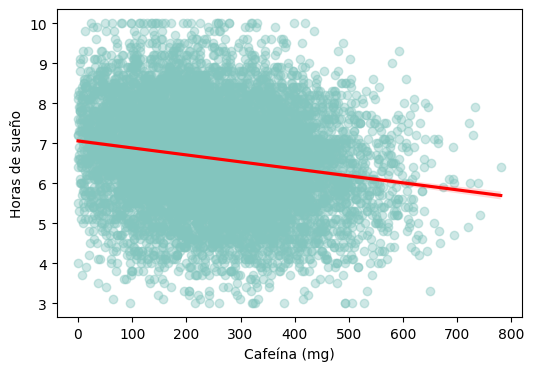

In [ ]:
# ==== REGPLOT ====

plt.figure(figsize=(6,4))
sns.regplot(
    data=df_consumo,
    x="caffeine_mg",
    y="sleep_hours",
    scatter_kws={"alpha":0.4, "color":"#83c5be"},
    line_kws={"color":"red"}
)

# plt.title("Relación cafeína vs sueño")
plt.xlabel("Cafeína (mg)")
plt.ylabel("Horas de sueño")
plt.show()


**Interpretación**

Si bien la linea presenta una tendencia negativa, esto indica una relación inversa débil, es decir que cuanta mas es la cafeína que se consume en miligramos, menor es la cantidad de horas diarias que se duerme en promedio. La dispersión de puntos es alta, lo que significa que el consumo no explica gran parte de la variabilidad del sueño.

######**5.5.2.4.2 Justificación estadística de hipótesis *2.b* (numérica-numérica)**

Se decide completar el análisis buscando si esa pediente negativa es significativa o no. Por lo tanto, como se decide evaluar o explorar si a mayor o menor consumo de cafeína cambia la cantidad de horas de sueño (si esta es una relacion lineal o no, monótona -no necesariamente lineal- o no), es que se realizan 2 test estadisticos de correlación: el de test *Pearson* (evalúa correlación lineal) y el de *Spearman* (evalua correlación monótona). Hay que tener en cuenta que el *test de Pearson* se aplica cuando ambas variables que son numéricas contínuas y que siguen una distribución aproximadamente normal, como en este caso. El *test de Spearman* es un test no paremétrico, para variables que no tienen una distribución normal, se decidio utilizar este también, porque indica si existe una relación monótona (no necesariamente lineal), es decir, si al aumentar una variable, la otra tiende consistentemente a subir o bajar, aunque no a ritmo constante.

In [ ]:
# Filtrar solo consumidores
df_consumo = df_coffee[df_coffee['caffeine_mg'] > 0]

x = df_consumo["caffeine_mg"]
y = df_consumo["sleep_hours"]

# Correlación Pearson
pearson_corr, pearson_p = pearsonr(x, y)
print("\n--- Test de Correlación de Pearson ---")
print("Correlación de Pearson:", round(pearson_corr, 4))
print(f"p-valor: {pearson_p:.4f}")

# Correlación Spearman
spearman_corr, spearman_p = spearmanr(x, y)
print("\n--- Test de Correlación de Spearman ---")
print("Correlación de Spearman:", round(spearman_corr, 4))
print(f"p-valor: {spearman_p:.4f}")


--- Test de Correlación de Pearson ---
Correlación de Pearson: -0.1854
p-valor: 0.0000

--- Test de Correlación de Spearman ---
Correlación de Spearman: -0.1849
p-valor: 0.0000


**Resultado**

Se obtienen resultados similares para ambos test estadísticos, tanto en coeficientes de correlación como en nivel de significación (p-valor). En ambos casos los coefiencientes de correlación son negativos, marcado que a mayor consumo de cafeína, menor es la cantidad de horas q se duerme, reforzando de esta forma lo observado graficemente y lo que a nivel de conocimiento general enla población se sabe.  Pero como el valor  de ambos coeficientes de correlacion es cercano a cero, la relación no es muy clara, esto significa que aunque existe una relación, la cafeína no explica gran parte de la variabilidad en las horas de sueño.

Se decide realizar nuevamente el gráfico incluyendo en el título el coeficiente de correlacion de* Pearson *y su p-valor.

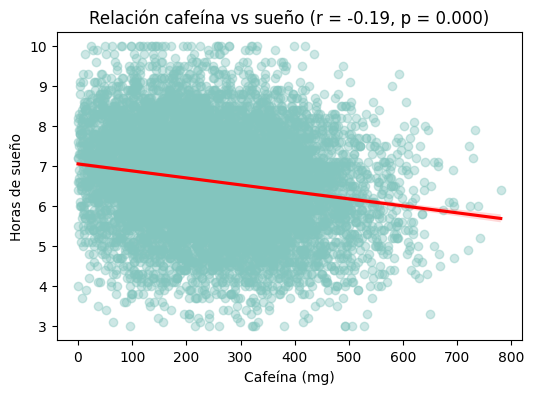

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=df_consumo,
    x="caffeine_mg",
    y="sleep_hours",
    scatter_kws={"alpha":0.4, "color":"#83c5be"},
    line_kws={"color":"red"}
)

plt.title(f"Relación cafeína vs sueño (r = {pearson_corr:.2f}, p = {pearson_p:.3f})") #leyenda superior
plt.xlabel("Cafeína (mg)")
plt.ylabel("Horas de sueño")
plt.show()

######**5.5.2.4.3 Conclusión hipótesis *2.b* (numérica-numérica)**

---


*La relación entre el consumo de cafeína y las horas de sueño muestra un patrón similar tanto al considerar la población total como solo a los consumidores, lo que indica que la inclusión de no consumidores no modifica sustancialmente la tendencia general. En ambos casos se observa una **relación inversa leve: a mayor ingesta de cafeína, menor duración promedio del sueño**.*

*Los coeficientes de correlación de Pearson y Spearman fueron negativos, en concordancia con la tendencia observada en los gráficos. Aunque los valores son bajos —lo que indica una relación débil—, la significancia estadística (p < 0.001) sugiere que la asociación no es producto del azar. En conjunto, **los resultados respaldan la existencia de un vínculo real, aunque de magnitud limitada, entre el consumo de cafeína y la duración del sueño**.*


---

####*5.5.3 Calidad de sueño [sleep_quality] con consumo de cafeína en mg[caffeine_mg] (categórica - numérica)*

Se decide probar si se observa el mismo comportamiento cuando se testea la variable categórica `sleep_quality` con respecto a la variable numérica `caffeine_mg`. Con este análisis se terminaria de responder si existe asociación entre la cantidad de cafeina ingerida en mg con la calidad  de sueño. Dado que en el 5.5.1 se observó una relación positiva entre `sleep_hours` y `sleep_quality`, se espera encontrar un patrón coherente al analizar ambas variables por separado frente al consumo de cafeína.

#####**5.5.3.1  Visualizaciones**

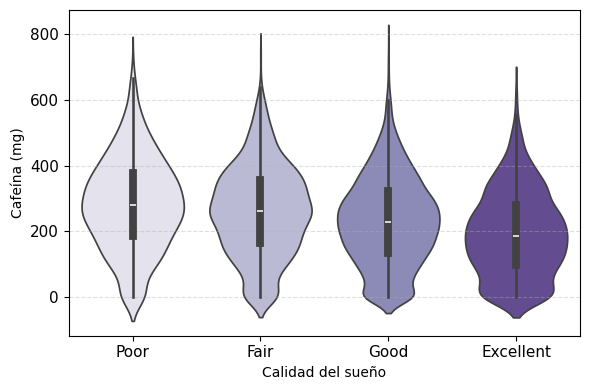

In [ ]:
# Asegurar orden ordinal correcto
order = ["Poor", "Fair", "Good", "Excellent"]

# Crear paleta
palette = sns.color_palette("Purples", n_colors=len(order))

# ==== Violinplot ====
plt.figure(figsize=(6, 4))
sns.violinplot(
    data=df_coffee,
    x="sleep_quality",
    y="caffeine_mg",
    hue="sleep_quality",
    order=order,
    palette=palette,
    legend=False,
    inner="box"
)

# plt.title("Distribución del consumo de cafeína (mg) según la calidad del sueño", fontsize=13)
plt.xlabel("Calidad del sueño")
plt.ylabel("Cafeína (mg)")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Interpretación**

El gráfico de violín muestra que las distribuciones de consumo de cafeína (`caffeine_mg`) son bastante similares entre los distintos niveles de calidad del sueño (`sleep_quality`), sin diferencias marcadas en su forma ni en la dispersión. Aun así, se aprecia una leve tendencia: las medianas de consumo tienden a ser menores a medida que mejora la calidad del sueño. Los grupos con sueño Poor y Fair concentran medianas cercanas a los 300 mg diarios, mientras que quienes reportan un sueño *Good* o *Excellent* presentan valores algo inferiores.

En todas las categorías aparecen colas extendidas hacia valores altos de cafeína, lo que evidencia la presencia de casos con consumos muy elevados. Estos coinciden con los valores atípicos observados en el análisis univariado y reflejan a individuos con ingestas excepcionales, que incrementan la dispersión sin alterar sustancialmente la tendencia central.

#####**5.5.3.2  Reformulación de hipótesis**



Dado que el valor cero de cafeína representa a individuos que no consumen cafeína, se evalúa el comportamiento por separado para consumidores y no consumidores, con el fin de evitar que la presencia de ceros distorsione los patrones dentro de la población que sí consume.

Para ello, se plantean dos preguntas complementarias:

a.  *¿Los no consumidores de cafeína presentan una calidad de sueño diferente a la de los consumidores?*

b.  *Dentro de la población de consumidores, ¿se observa una tendencia entre una mayor ingesta de cafeína (mg/día) y una menor calidad del sueño?*

Estos mismo de debió plantear en la evaluación de la relación del apartado anterior.

#####**5.5.3.3 Testeo de hipótesis *3.a* (categórica-numérica)**

Para responder el primer interrogante (a), se deben contrastar 2 variables categóricas [`sleep_quality`] con la creada [`consumo2`] que divide a la población entre no consumidores y consumidores de cafeína (asumiendo como en el apartado anterior que los no consumidores son aquellos con consumo nulo, es decir con valor cero de `caffeine_mg`).

In [ ]:
#recreación de variable binaria "consumo [si/no]" como consumo2
df_coffee['consumo2'] = df_coffee['caffeine_mg'].apply(lambda x: "No" if x == 0 else "Sí")

######**5.5.3.3.1 Visualizaciones hipótesis *3.a* (categórica-numérica)**

Se prodede a utilizar un grafico de barras para observar como se distribuye la población de consumidores y no consumidores en cada una.

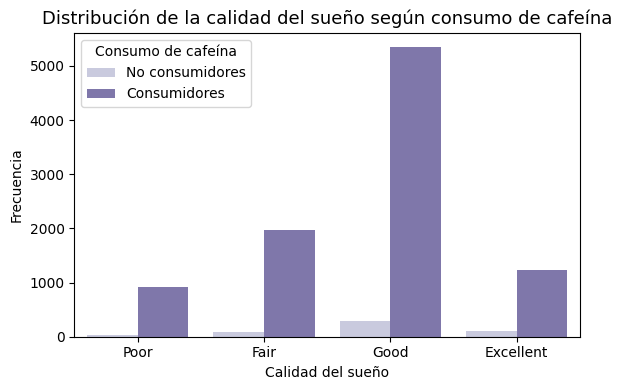

In [ ]:
# ==== Grafico de barras ====

plt.figure(figsize=(6,4))
sns.countplot(
    data=df_coffee,
    x="sleep_quality",
    hue="consumo2", # variable binaria creada
    hue_order=["No", "Sí"],
    order=["Poor", "Fair", "Good", "Excellent"],
    palette="Purples"
)

plt.title("Distribución de la calidad del sueño según consumo de cafeína", fontsize=13)
plt.xlabel("Calidad del sueño")
plt.ylabel("Frecuencia")
plt.legend(title="Consumo de cafeína", labels=["No consumidores", "Consumidores"])
plt.tight_layout()
plt.show()

In [ ]:
tabla_abs = pd.crosstab(df_coffee["sleep_quality"], df_coffee["consumo2"], margins=True)
tabla_abs = tabla_abs.drop("All", errors="ignore") #se elimina esta fila que se crea por defecto al crear la binarizacion de caffeina_mg

tabla_rel = pd.crosstab(df_coffee["sleep_quality"], df_coffee["consumo2"], normalize="columns") * 100
tabla_rel = tabla_rel.round(1)

tabla_completa = pd.DataFrame({
    "No consumidores (abs)": tabla_abs["No"],
    "No consumidores (%)": tabla_rel["No"],
    "Consumidores (abs)": tabla_abs["Sí"],
    "Consumidores (%)": tabla_rel["Sí"]
})

# Agregar fila de totales manualmente
tabla_completa.loc["Total"] = [
    tabla_abs["No"].sum(), 100.0,
    tabla_abs["Sí"].sum(), 100.0
]

display(tabla_completa)

,No consumidores (abs),No consumidores (%),Consumidores (abs),Consumidores (%)
sleep_quality,,,,
Poor,35.0,6.6,926.0,9.8
Fair,86.0,16.3,1964.0,20.7
Good,295.0,55.9,5342.0,56.4
Excellent,112.0,21.2,1240.0,13.1
Total,528.0,100.0,9472.0,100.0


**Interpretación**

En la distribución de la calidad del sueño según el consumo de cafeína se observa que los consumidores concentran la mayoría de los casos, principalmente en las categorías “Good” y “Fair”. Según la tabla de frecuencias, entre los no consumidores el 21,2 % reporta sueño “Excellent”, mientras que entre los consumidores este valor desciende a 13,1 %. En cambio, las proporciones de sueño “Poor” y “Fair” son mayores en quienes consumen cafeína (9,8 % y 20,7 %) respecto de los no consumidores (6,6 % y 16,3 %), mientras que la categoría “Good” se mantiene prácticamente igual (55,9 % y 56,4 %). En conjunto, los resultados sugieren que quienes consumen cafeína tienden a reportar una calidad de sueño ligeramente inferior, aunque la diferencia es moderada y debería verificarse mediante pruebas estadísticas (por ejemplo, test Chi²).

######**5.5.3.3.2 Justificación estadística de hipótesis *3.a* (categórica-numérica)**

Se decide realizar el *test de Chi²*, para evaluar la significancia de la diferencia. Se elgió este porque la variable `sleep_quality `es categóica, pero la variable numérica `caffeine_mg`, la categorizamos en 2 grupos (consumidores y no consumidores) nombrandose como `consumo2`.

In [ ]:
tabla_chi = pd.crosstab(df_coffee["sleep_quality"], df_coffee["consumo2"])
chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("\n--- Test de Chi cuadrado ---")
print(f"Chi²-statistic= {chi2:.3f}")
print(f"p-valor = {p:.4f}")


--- Test de Chi cuadrado ---
Chi²-statistic= 34.400
p-valor = 0.0000


**Resultado**

Se observa una diferencia estadísticamente significativa (p < 0.001) en la calidad del sueño entre no consumidores y consumidores de cafeína. Estos resultados permiten afirmar que existe una asociación significativa entre el consumo de cafeína y la calidad del sueño.

---

######**5.5.3.3.3 Conclusión hipótesis *3.a* (categórica-numérica)**

---


*Los resultados obtenidos muestran que la **calidad del sueño difiere significativamente según el consumo de cafeína.** En términos generales, las personas que consumen cafeína presentan una menor proporción de sueño “Excellent” y una mayor frecuencia de categorías “Fair” y “Poor” en comparación con quienes no consumen. El test de Chi-cuadrado confirmó esta diferencia como estadísticamente significativa (p < 0.001), evidenciando una asociación entre el consumo de cafeína y una calidad de sueño levemente inferior.*

*Aunque la magnitud del efecto es moderada, **los hallazgos sugieren que el consumo de cafeína podría constituir un factor asociado a una menor calidad del descanso,** aspecto que merece ser considerado en estrategias de promoción de hábitos saludables de sueño y en futuras investigaciones que analicen la relación causal entre ambos factores.*


---

#####**5.5.3.4 Testeo de hipótesis *3.b* (categórica-numérica)**

Para completar el analisis, y responder el interrogante b "Dentro de la población de consumidores, ¿Se observa una tendencia entre una mayor ingesta de cafeína (mg/día) y una menor calidad del sueño?". Se debe primero, trabajar con el subgrupo de consumidores, en este caso se contrastan una variable numérica [`caffeine_mg`] y una variable categórica [`sleep_quality`].  

######**5.5.3.4.1 Visualizaciones hipótesis *3.b* (categórica-numérica)**

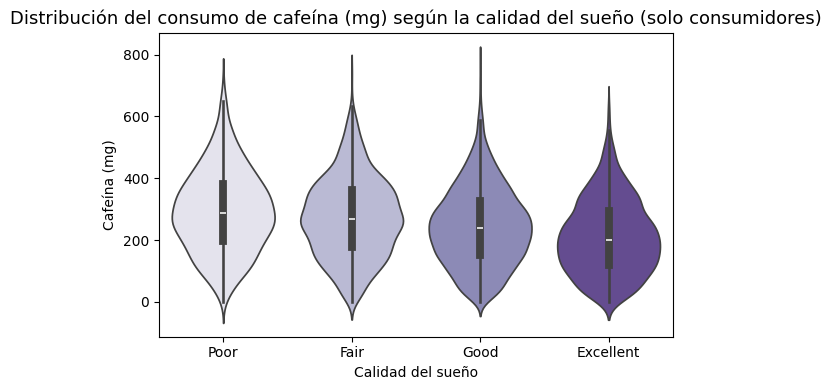

,n,media,mediana,desvío estándar,mínimo,P25,P75,máximo,IQR,CV (%)
sleep_quality,,,,,,,,,,
Poor,926,293.7,286.2,133.3,0.3,197.9,380.8,720.0,182.9,45.4
Fair,1964,274.2,268.8,129.9,0.4,177.2,361.1,742.2,183.9,47.4
Good,5342,245.3,238.0,126.7,0.1,152.2,327.4,780.3,175.2,51.7
Excellent,1240,212.2,201.6,120.3,0.4,119.5,295.6,639.9,176.2,56.7


In [ ]:
 #--- Filtrar solo consumidores ---
df_consumidores = df_coffee[df_coffee["caffeine_mg"] > 0].copy()

# --- Orden ordinal de categorías ---
order = ["Poor", "Fair", "Good", "Excellent"]
df_consumidores["sleep_quality"] = pd.Categorical(df_consumidores["sleep_quality"], categories=order, ordered=True)

# --- Violinplot ---
plt.figure(figsize=(6,4))
sns.violinplot(
    data=df_consumidores,
    x="sleep_quality",
    y="caffeine_mg",
    hue="sleep_quality",
    order=order,
    palette=sns.color_palette("Purples", 4),
    legend=False,
    inner="box"
)
plt.title("Distribución del consumo de cafeína (mg) según la calidad del sueño (solo consumidores)", fontsize=13)
plt.xlabel("Calidad del sueño")
plt.ylabel("Cafeína (mg)")
plt.tight_layout()
plt.show()

# --- Tabla descriptiva ---
tabla_estad = (
    df_consumidores.groupby("sleep_quality", observed=True)["caffeine_mg"]
    .agg([
        ("n", "count"),
        ("media", "mean"),
        ("mediana", "median"),
        ("desvío estándar", "std"),
        ("mínimo", "min"),
        ("P25", lambda x: x.quantile(0.25)),
        ("P75", lambda x: x.quantile(0.75)),
        ("máximo", "max"),
        ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("CV (%)", lambda x: (x.std() / x.mean()) * 100),
    ])
    .round(1)
)

display(tabla_estad)

**Interpretación**

Tanto el gráfico como la tabla muestran que, entre los consumidores de cafeína, la distribución del consumo diario (mg/día) es heterogénea: la mayoría se concentra cerca de la mediana, aunque persiste una cola extendida hacia la derecha que refleja una leve asimetría positiva. Esto sugiere que, si bien la mayoría consume cantidades moderadas, existe un pequeño grupo con ingestas significativamente más altas.

De manera consistente con lo observado en la población total, se advierte una ligera tendencia: las medianas de consumo disminuyen a medida que mejora la calidad del sueño (de *Poor* a *Excellent*). Esto apunta a una posible relación inversa entre la cantidad de cafeína ingerida y la calidad de sueño percibida. En conjunto, ambos análisis —total y de consumidores— muestran un patrón similar: una distribución amplia y asimétrica, con una tendencia general hacia un mayor consumo asociado a una menor calidad del descanso, aunque sin diferencias pronunciadas entre los grupos.

######**5.5.3.4.2 Justificación estadística de hipótesis *3.b* (categórica-numérica)**

Como se estan evaluando una variable numérica continua [caffeine_mg] y una variable categórica ordinal [`sleep_quality`], se decide realizar test estadisticos no paraméatricos ya que se observó que las distribución de los datos no sigue una normal y las categorias de [`sleep_quality`] no son intervalos numéricos equidistantes. Se aplicaran los test *Spearman* y *Kruskal–Wallis*.
Con el Test de *Spearman,* evaluamos la tendencia ordinal monotónica (si aumenta una variable, la otra disminuye o aumenta consistentemente) la cual sirve para responder el interrogante de "a mayor calidad de sueño, menor consumo de cafeína" (una relación direccional). Mientras que *Kruskal–Wallis (K-W)*, en este caso se usa solo para confirmar que las distribuciones difieren globalmente, reforzando la evidencia. En este contexto, no se considera necesario realizar un test post hoc de *Dunn*, ya que la hipótesis de interés se refiere a una tendencia ordinal general y no a comparaciones específicas entre pares de grupos.



In [ ]:

# --- Filtrar solo consumidores (por seguridad, si no está definido) ---
df_consumidores = df_coffee[df_coffee["caffeine_mg"] > 0].copy()

# --- Asegurar orden ordinal de la calidad del sueño ---
order = ["Poor", "Fair", "Good", "Excellent"]
mapping = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
df_consumidores["sleep_quality"] = pd.Categorical(df_consumidores["sleep_quality"], categories=order, ordered=True)
df_consumidores["sleep_quality_num"] = df_consumidores["sleep_quality"].map(mapping)

# --- Test de correlación de Spearman ---
rho, p_spear = spearmanr(df_consumidores["caffeine_mg"], df_consumidores["sleep_quality_num"])

# --- Test de Kruskal–Wallis ---
groups = [
    df_consumidores.loc[df_consumidores["sleep_quality"] == cat, "caffeine_mg"]
    for cat in order
]
H, p_kruskal = kruskal(*groups)

# --- Mostrar resultados formateados ---
print(f"--- Test de Spearman ---")
print(f"Coeficiente ρ = {rho:.3f}")
print(f"p-valor = {p_spear:.4f}")

print("\n--- Test de Kruskal–Wallis ---")
print(f"H-statistic = {H:.3f}")
print(f"p-valor = {p_kruskal:.4f}")

--- Test de Spearman ---
Coeficiente ρ = -0.171
p-valor = 0.0000

--- Test de Kruskal–Wallis ---
H-statistic = 277.772
p-valor = 0.0000


**Resultados**

El análisis de correlación de Spearman evidenció una asociación inversa significativa entre el consumo de cafeína (mg/día) y la calidad del sueño (ρ = –0.171, p < 0.001), indicando que a mayor consumo de cafeína se asocia una peor calidad de sueño.

Asimismo, el test de Kruskal–Wallis mostró diferencias estadísticamente significativas en las medianas de consumo de cafeína entre las distintas categorías de calidad del sueño (H = 277.772, p < 0.001), lo que confirma que los niveles de ingesta difieren según la calidad del sueño reportada.

---
######**5.5.3.4.3 Conclusión hipótesis *3.b* (categórica-numérica)**


---


*Los resultados evidencian una **relación inversa y estadísticamente significativa entre el consumo de cafeína y la calidad del sueño: a mayor ingesta diaria, peor calidad percibida del descanso**. Aunque la asociación es moderada, el patrón se mantiene tanto en la población total como entre los consumidores, lo que refuerza la solidez del hallazgo.*

La distribución del consumo, amplia y asimétrica, sugiere que un pequeño grupo concentra valores muy altos, posiblemente responsables de parte de los efectos adversos observados sobre el sueño. **En conjunto, los análisis destacan la relevancia de moderar el consumo de cafeína como parte de las estrategias destinadas a promover hábitos de descanso saludables**.

---

####*5.5.4 Horas de sueño [sleep_hours] (variable target) con nivel de estrés [stress_level] (numérica - categórica)*

 En los siguientes apartados (5.5.2 a 5.5.4) se intenta dar respuesta a este interrogante "*Existe relación entre la cantidad de horas de sueño o su calidad y el nivel de estrés o problemas de salud o actividad física?*", por lo tanto se decide utilizar nuevamente nuestra variable target `sleep_hours`, buscando relaciones por separado de esta con el nivel de estrés (`stress_level`), problemas de salud (`health_issues`) y las horas de actividad física (`physical_activity_hours`)

#####**5.5.4.1  Visualizaciones**

Se comienza buscado si existe difrencia entre los distintos niveles de estrés y las horas de sueño, utilizando un violinplot. y una tabla de estadistica descriptiva básica.

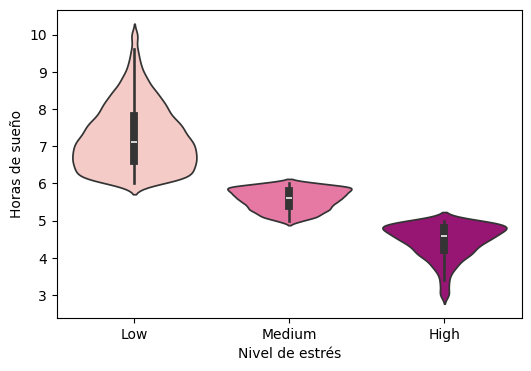

,n,media,mediana,desvío estándar,mínimo,P25,P75,máximo,IQR,CV (%)
stress_level,,,,,,,,,,
Low,6989,7.2,7.1,0.9,6.0,6.6,7.8,10.0,1.2,11.8
Medium,2050,5.6,5.6,0.3,5.0,5.4,5.8,6.0,0.4,5.0
High,961,4.5,4.6,0.5,3.0,4.2,4.8,5.0,0.6,10.2


In [ ]:
# Violinplot
plt.figure(figsize=(6,4))
sns.violinplot(
    data=df_coffee,
    x="stress_level",
    y="sleep_hours",
    hue="stress_level",
    palette="RdPu",
    legend=False,
    inner="box"
)

# plt.title("Horas de sueño según nivel de estrés")
plt.xlabel("Nivel de estrés")
plt.ylabel("Horas de sueño")
plt.show()

# --- Tabla descriptiva ---
order = ["Low", "Medium", "High"]
df_coffee["stress_level"] = pd.Categorical(df_coffee["stress_level"], categories=order, ordered=True)
tabla_estad_2 = (
    df_coffee.groupby("stress_level", observed=True)["sleep_hours"]
    .agg([
        ("n", "count"),
        ("media", "mean"),
        ("mediana", "median"),
        ("desvío estándar", "std"),
        ("mínimo", "min"),
        ("P25", lambda x: x.quantile(0.25)),
        ("P75", lambda x: x.quantile(0.75)),
        ("máximo", "max"),
        ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("CV (%)", lambda x: (x.std() / x.mean()) * 100),
    ])
    .round(1)
)
display(tabla_estad_2)

**Interpretación**

Se observa que a mayor nivel de estrés reportado menor es la cantidad de horas que se duerme (relación negativa).

*   Los individuos con estrés bajo tienen una mediana  de 7.1 horas de sueño, con el mayor rango intercuartílico (IQR = 1.2 h), lo que se puede interpretar como  una distribución relativamente amplia y heterogénea, donde también aparecen los valores máximos observados (10.0 horas).
*  En los de estrés medio, la mediana desciende a aproximadamente 5.6 horas y la dispersión es más reducida (SD = 0.3, IQR = 0.4), lo que indica un grupo relativamente homogéneo.
*   Los de pertenecen al grupo de estrés alto tienen la mediana más baja (aproximadamente 4,6 horas) y los valores mínimos (3.0 horas), por lo tanto se puede entender el grupo con mayor estrés concentra las menores duraciones de sueño.

Los coeficientes de variación (CV%) confirman que, el grupo de estrés bajo es más heterogéneo (CV = 11.8%), seguido por los de estrés alto (CV = 10.2%).Finalmente el grupo con estrés medio quien presenta menor variabilidad relativa.

Integrando el gráfico y la tabla, en ambos se puede observar  un patron que respalda la existencia de una asociación negativa consistente entre el estrés y la duración del sueño, donde niveles más altos de estrés se vinculan con una menor cantidad y variabilidad de horas dormidas.

#####**5.5.4.2 Justificción estadística**

Para completar el análisis  y determinar estadisticamente, si las horas de sueño (numérica contínua) promedio difieren según el nivel de estrés de los participante, al ser estos 3 grupos independientes y  sleep_hours numérica contínua, se debe utilizar el test de ANOVA (Analysis of Variance de sus siglas en inglés) de un factor. Esta evaluando de esta forma, si las diferencias observadas en las medias de horas de sueño entre niveles de estrés son mayores de lo que se esperaría por azar.
Dado que las distribuciones de cada grupo son aproximadamente simétricas, con varianzas comparables y pocos valores atípicos, y considerando el elevado tamaño muestral, se mantiene el enfoque paramétrico mediante ANOVA de un factor.

In [ ]:

# Extraer horas de sueño por grupo
low = df_coffee[df_coffee["stress_level"]=="Low"]["sleep_hours"]
medium = df_coffee[df_coffee["stress_level"]=="Medium"]["sleep_hours"]
high = df_coffee[df_coffee["stress_level"]=="High"]["sleep_hours"]

# ANOVA de un factor
f_stat, p_val = stats.f_oneway(low, medium, high)
print("\n--- Test de ANOVA---")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")


--- Test de ANOVA---
F-statistic: 8731.4236
p-value: 0.0000


 **Resultado**

 El análisis de varianza (ANOVA de un factor) mostró diferencias altamente significativas en las medias de horas de sueño entre los distintos niveles de estrés (F = 8731.42, p < 0.001).
Este resultado indica que el nivel de estrés se asocia de manera significativa con la duración promedio del sueño, observándose un descenso progresivo de las horas dormidas conforme aumenta el nivel de estrés (7.2 h en bajo, 5.6 h en medio y 4.5 h en alto).

Para identificar entre qué niveles de estrés existen diferencias significativas, se recomienda aplicar un test post hoc de *Tukey HSD* (del inglés Honestly Significant Difference), que permite comparaciones múltiples controlando el error tipo I (el riesgo de detectar falsos positivos al hacer muchas comparaciones).

In [ ]:
# Preparar datos
tukey = pairwise_tukeyhsd(
    endog=df_coffee["sleep_hours"],     # variable numérica
    groups=df_coffee["stress_level"],   # variable categórica
    alpha=0.05                          # nivel de significancia
)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
  High    Low   2.7954   0.0 2.7359  2.8549   True
  High Medium   1.1248   0.0 1.0572  1.1924   True
   Low Medium  -1.6706   0.0 -1.714 -1.6272   True
--------------------------------------------------


**Resultado**

Se puede observar que existe diferencia significativa entre las horas promedio de sueño y el nivel de estrés. Las personas que reportaron niveles de estrés alto presentan una difrencia en promedio 3 horas con los de estrés bajo y 1,1 hora con los de estrés medio. Mientras que los que reportaton nivel de estrés medio, presentaron una diferencia de 1,7 hs respecto a los de nivel de estrés bajo. En resumen, los tres grupos difieren significativamente entre sí en las horas de sueño, con un patron de menor nivel de estres, más horas de sueño y por tanto, mayor nivel de estrés menor horas de sueño.

**Conclusión del análisis estadístico**

Se realizaró en primera instancia un análisis de varianza de un factor (ANOVA), el cual evidenció que existen efectivamente, diferencias significativas entre las horas de sueño y los niveles de estrés con un p-valor < 0.001.
Debido a que el test de ANOVA fue significativo, se decidió realizar el el test post hoc de Tukey, para identificar que grupos o niveles de estres difieren entre si, ya que el primer test no nos permitia obtener esta infomación. El resultado del test post hoc de Tukey mostró que todos los grupos difieren entre sí (p < 0.001) de la siguiente forma:
   *   Los individuos con estrés bajo duermen en promedio 2.8 horas más que aquellos con estrés alto.
   *   Los de estrés medio duermen 1.1 horas más que los de estrés alto.
   *   Finalmente, los de estrés bajo duermen 1.7 horas más que los de estrés medio.

Estos resultados respaldan una asociación negativa entre el nivel de estrés y la cantidad de horas de sueño, mostrando que a mayor nivel de estrés percibido, menor es la duración promedio del sueño.

#####**5.5.4.3 Conclusión**

---

*Se concluye que **entre el nivel de estrés y la cantidad de horas de sueño, existe una asociación negativa estadísticamente significativa, esto se interpreta como a mayor nivel de estrés percibido, menor es la duración promedio del sueño**.*


---

####*5.5.5 Horas de sueño [sleep_hours] (variable target) con problemas de salud[health_issues] (numérica - categórica)*

#####**5.5.5.1  Visualizaciones**

En este caso se evaluar si existe relación entre las horas de sueño y los problemas de salud. Se decide hace una exploración general, pero del análisis univariado ya se conoce que existen varias personas que refirieron no tener problemas de salud, por lo tanto es de esperar que luego se deban separar subpoblaciones con y sin problemas de salud.

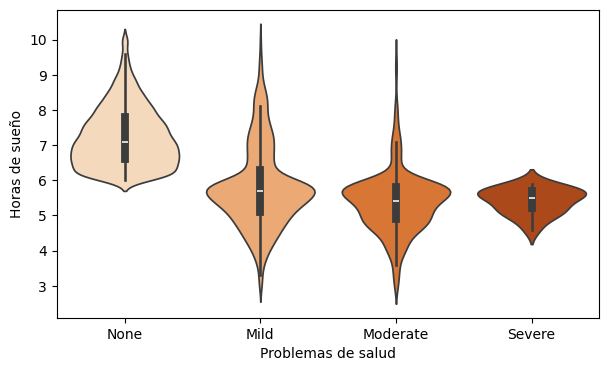

,n,media,mediana,desvío estándar,mínimo,P25,P75,máximo,IQR,CV (%)
health_issues,,,,,,,,,,
None,5941,7.2,7.1,0.9,6.0,6.6,7.8,10.0,1.2,11.8
Mild,3579,5.8,5.7,1.2,3.0,5.1,6.3,10.0,1.2,20.0
Moderate,463,5.4,5.4,0.9,3.0,4.9,5.8,9.5,0.9,16.1
Severe,17,5.4,5.5,0.4,4.6,5.2,5.7,5.9,0.5,6.7


In [ ]:
# ==== Violinplot ====

custom_palette = sns.color_palette("Oranges", n_colors=df_coffee["health_issues"].nunique()) #paleta personalizada

plt.figure(figsize=(7,4))
sns.violinplot(
    data=df_coffee,
    x="health_issues",
    y="sleep_hours",
    hue="health_issues",
    palette=custom_palette,
    legend=False,
    inner="box"   # agrega la caja con mediana y cuartiles
)

# plt.title("Horas de sueño según problemas de salud")
plt.xlabel("Problemas de salud")
plt.ylabel("Horas de sueño")
plt.show()

# --- Tabla descriptiva ---
order = ["None", "Mild", "Moderate", "Severe"]
df_coffee["health_issues"] = pd.Categorical(df_coffee["health_issues"], categories=order, ordered=True)
tabla_estad_3 = (
    df_coffee.groupby("health_issues", observed=True)["sleep_hours"]
    .agg([
        ("n", "count"),
        ("media", "mean"),
        ("mediana", "median"),
        ("desvío estándar", "std"),
        ("mínimo", "min"),
        ("P25", lambda x: x.quantile(0.25)),
        ("P75", lambda x: x.quantile(0.75)),
        ("máximo", "max"),
        ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("CV (%)", lambda x: (x.std() / x.mean()) * 100),
    ])
    .round(1)
)
display(tabla_estad_3)

**Interpretación**

 Se puede observar una clara diferencia entre los que no presentan problemas de salud con respecto a los que si presentan problemas de salud
*   **Sin problemas de salud - Ninguno-** [None]: Representa casi el 60% de la población. Presentan la media y mediana más altas (aproximadamente 7 horas), con una distribución más simétrica y relativamente homogénea (CV = 11,8%). Su rango intercuartílico (IQR = 1,2 h) y su límite superior (Q3 = 7,8 h) indican que la mayoría duerme entre 6 y 8 horas, aunque se observan algunos valores extremos (>9–10 h).

Dentro de este último subgrupo (con problemas de salud):
*  **Leve** [Mild]: muestran una reducción marcada del sueño (mediana = 5,7 h) y la mayor heterogeneidad del conjunto (CV = 20%). El amplio rango (3–10 h) y el IQR = 1,2 h reflejan alta variabilidad y la presencia de outliers en ambos extremos, que luego seran evaluados.
*  **Moderado**[Moderate]: con menor tamaño muestral, mantienen un perfil similar al anterior, aunque algo más homogéneo (CV = 16,1%), con mediana = 5,4 h y dispersión moderada (IQR = 0,9 h). Se destaca a nivel gráfico y de tabla valores atípico en ambos extramos, que luego seran evaluados.
*  **Severo**[Severe]:es el grupo más pequeño (n = 17), y a la vez el más uniforme (CV = 6,7%). Las horas de sueño se concentran entre 5 y 6 h, con media y mediana de 5,4–5,5 h y sin valores extremos evidentes

En conjunto, los resultados muestran que quienes no reportan problemas de salud duermen más horas, con un mínimo de 6 horas en la mayoría de los casos.
Entre quienes presentan problemas de salud, la relación con la severidad no es completamente lineal: los grupos **Mild** y **Moderate** son muy similares en dispersión y valores centrales, mientras que el grupo **Severe**, aunque pequeño, exhibe una menor variabilidad pero concentrado en pocas horas de sueño.

**Conclusión visualizaciones**

*De las visualizaciones se puede concluir que los que no presentan problemas de salud son aquellos que en promedio duermen mas horas, pero dentro de los que presentan problemas de salud la severidad no tiene una relación directamente proporcinal a la cantidad de horas de sueño reportadas*

#####**5.5.5.2 Justificción estadística**

Puesto que se desea evaluar si las horas de sueño (variable numérica contínua) difieren según el nivel de problemas de salud (variable categórica ordinal), y no existe criterio de normalidad y la distribucion individuos entre grupos es muy desbalanceada (n=17 vs 5941), es que se deben utilizar un test no parametrico como el de Kruskal–Wallis.
Este test evalúa si al menos un grupo tiene una mediana significativamente distinta de los demás.

In [ ]:
# Extrae horas de sueño por grupo
groups = [df_coffee[df_coffee["health_issues"]==cat]["sleep_hours"]
          for cat in ["None","Mild","Moderate","Severe"]]

# Kruskal-Wallis
H, p = stats.kruskal(*groups)
print("\n--- Test de Kruskal-Wallis---")
print(f"H-statistic: {H:.3f}")
print(f"p-value: {p:.3f}")


--- Test de Kruskal-Wallis---
H-statistic: 3958.702
p-value: 0.000


**Resultados**

El test de Kruskal–Wallis indicó diferencias estadísticamente significativas en las horas de sueño entre los distintos niveles de problemas de salud (H = 3958.702, p < 0.001).

Del análisis anterior se observó que existen diferencias estadísticamente significativas en las horas de sueño entre los distintos grupos de problemas de salud.
Para identificar entre qué grupos se presentan dichas diferencias, se aplicó un test post hoc de Dunn con corrección de Holm, que realiza comparaciones por pares entre las categorías. En este caso se utiliza Holm por estar desbalancedas las distintas categorías.
Los resultados se presentan con una notación diferencial de significancia, donde los asteriscos indican el nivel de evidencia estadística:
* p < 0.05, ** p < 0.01, *** p < 0.001 y ns indica que la diferencia no es significativa.

In [ ]:
# Test de Dunn post hoc
dunn_1 = sp.posthoc_dunn(
    df_coffee,
    val_col="sleep_hours",
    group_col="health_issues",
    p_adjust="holm"
)

# Redondeo a 3 decimales
dunn_1_rounded = dunn_1.round(3)

# Agregar asteriscos según significancia
def significance_marker(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    else:
        return "ns"  # no significativo

# Aplicar función a cada celda
dunn_1_styled = dunn_1_rounded.apply(lambda col: col.map(lambda x: f"{x:.3f} {significance_marker(x)}"))

print("\n--- Test de post hoc Dunn c/ajuste Holm---")
print("\n p-valores ajustados con significancia:")
display(dunn_1_styled)


--- Test de post hoc Dunn c/ajuste Holm---

 p-valores ajustados con significancia:


,None,Mild,Moderate,Severe
None,1.000 ns,0.000 ***,0.000 ***,0.000 ***
Mild,0.000 ***,1.000 ns,0.000 ***,0.147 ns
Moderate,0.000 ***,0.000 ***,1.000 ns,0.741 ns
Severe,0.000 ***,0.147 ns,0.741 ns,1.000 ns


**Resultados**

El análisis post hoc de Dunn con corrección de Holm reveló que:

*   El grupo sin problemas de salud (None) duerme significativamente más horas que todos los subgrupos que reportan problemas de salud (Mild, Moderate y Severe).
*  Entre los grupos con problemas de salud:

      *   Mild vs Moderate: presentan diferencias significativas (p-ajustado < 0.001).
      *   Mild vs Severe: la diferencia no alcanza significación estadística (p-ajustado = 0.147).
      *   Moderate vs Severe: la diferencia no alcanza significación estadística (p-ajustado = 0.741).

---


#####**5.5.5.3 Conclusíon**

---

*Los resultados muestran que **la presencia de problemas de salud se asocia con una menor cantidad de horas de sueño en comparación con la población sana**, hallazgo respaldado tanto por la evidencia gráfica como por los análisis estadísticos.*
*Sin embargo, **la severidad de los problemas de salud no presenta una relación lineal con una reducción progresiva del sueño**: los grupos con problemas severos no difieren significativamente de los grupos con afectación leve o moderada (p ajustado = 0.147 y 0.741, respectivamente; corrección de Holm).*


---

####*5.5.6 Horas de sueño [sleep_hours] (variable target) con horas de actividad física [physical_activity_hours] (numérica - numérica)*

En este caso se evaluar si existe relación entre las horas de sueño diarias y las horas de actividad física por semana. Se proceda a realizar el análisis tanto gráfico como estadístico.

#####**5.5.6.1  Visualizaciones**

Al tratarse de dos variables numéricas contínuas, se realiza un Regplot (visialización gráfica de regresión) para evaluar la relación.

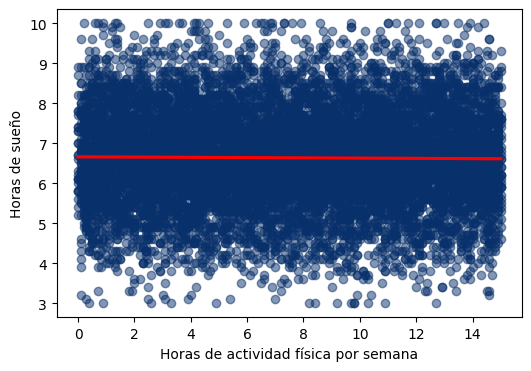

In [ ]:
# ==== Regplot ====

plt.figure(figsize=(6,4))

# Scatterplot con línea de regresión
sns.regplot(
    data=df_coffee,
    x="physical_activity_hours",
    y="sleep_hours",
    scatter_kws={"alpha":0.5, "color":"#08306b"},
    line_kws={"color":"red"}
)

# plt.title("Relación entre horas de sueño y actividad física")
plt.xlabel("Horas de actividad física por semana")
plt.ylabel("Horas de sueño")
plt.show()

**Interpretación**

Se observa una nube dispersa de puntos, que no sigue un patrón especifico. La linea de regresión (roja) es practicamente horizontal lo que sugiere que el cambio en `physical_activity_hours` no se asocia con variaciones en `sleep_hours`.

#####**5.5.6.2 Justificción estadística**

El *coeficiente de Pearson *se aplica cuando ambas variables son numéricas continuas y presentan una distribución aproximadamente normal, además de una relación lineal entre ellas. En este caso, la variable `sleep_hours` muestra una distribución casi normal, mientras que `physical_activity_hours` presenta una distribución uniforme, lo que se aleja del supuesto de normalidad y de linealidad.

Por este motivo se decidió utilizar el *coeficiente de Spearman*, un test no paramétrico adecuado para variables que no cumplen estos supuestos. Este coeficiente evalúa la existencia de una relación monótona (no necesariamente lineal) entre ambas variables.

Sin embargo, a nivel gráfico no se observa una tendencia lineal ni monótona evidente entre las horas de sueño y las de actividad física, por lo que el uso de *Spearman*se justifica para confirmar estadísticamente la ausencia de correlación significativa entre ambas variables.

In [ ]:
# Correlación

spearman_corr, spearman_p = spearmanr(df_coffee["physical_activity_hours"], df_coffee["sleep_hours"])

print(f"--- Test de Spearman ---")
print(f"Coeficiente ρ = {spearman_corr:.3f}")
print(f"p-valor = {spearman_p:.4f}")

--- Test de Spearman ---
Coeficiente ρ = -0.011
p-valor = 0.2864


**Resultado**

Se observa que el coeficiente de correlación es cercano a cero (-0.011), por lo que confirma la ausencia de asociación monótona identificada a nivel gráfico. Como el p-valor es 0.2864, es decir mayor a 0.05, no existe evidencia estadística para rechazar la hipotesis nula de "no asociación".



---

#####**5.5.6.3 Conclusíon parcial**

---


*Con estos datos, se puede concluir que no se observa relación lineal ni monótona entre las horas de sueño y las horas de actividad física. **En otras palabras, hacer más o menos actividad física semanal no se asocia con dormir más ni menos horas, al menos en esta muestra**.*


---

#####**5.5.6.4 Búsqueda de patrones ocultos**

Como contamos con una variable de calidad de sueño (variable categórica) se prueba relacionando esta con las horas de actividad fisica semanales (variable numérica) para ver si se observa algún patrón oculto del analisis anterior que buscaba relaciones entre 2 variables numéricas.

*Calidad de sueño[sleep_quality] con horas de actividad física [physical_activity_hours] (categórica - numérica)*

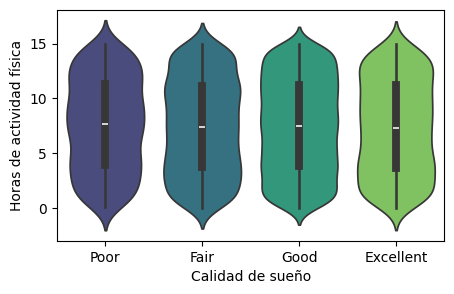

In [ ]:
#orden de la categoria
order = ["Poor", "Fair", "Good", "Excellent"]

# ==== Violinplot ====
plt.figure(figsize=(5,3))
sns.violinplot(
    data=df_coffee,
    x="sleep_quality",
    y="physical_activity_hours",
    hue="sleep_quality",
    order=order,
    palette="viridis",
    legend=False,
    inner="box"
)

# plt.title("Actividad física según calidad de sueño")
plt.xlabel("Calidad de sueño")
plt.ylabel("Horas de actividad física")
plt.show()

Se decide confirmarlo realizando un test estadistico de Krusskal-Wallis.

In [ ]:
# Asegura el orden ordinal de sleep_quality
orden = ['Poor', 'Fair', 'Good', 'Excellent']
df_coffee['sleep_quality'] = pd.Categorical(df_coffee['sleep_quality'],
                                            categories=orden, ordered=True)

# ---  Kruskal–Wallis ---
grupos = [df_coffee.loc[df_coffee['sleep_quality'] == cat, 'physical_activity_hours'].dropna()
          for cat in orden]

H_stat, p_kw = kruskal(*grupos)
n_total = sum(len(g) for g in grupos)
k = len(grupos)


print("\n--- Test de Kruskal-Wallis---")
print(f"H-statistic: {H_stat:.3f}")
print(f"p-value: {p_kw:.4f}")



--- Test de Kruskal-Wallis---
H-statistic: 2.154
p-value: 0.5411


**Resultado**

Se observa que no existe diferencia significativa entre los valores de mas medianas de horas de actividad fisica y la calidad del sueño (p-valor > 0.05)

---

#####**5.5.5.4 Conclusión**

---


 *A partir de los resultados obtenidos, **no** se evidenció **relación estadísticamente significativa entre las horas de actividad física semanal y las horas ni la calidad del sueño**. Tanto el análisis gráfico como los tests de Spearman (para variables numéricas) y Kruskal–Wallis (para comparar medianas entre niveles de calidad del sueño) indicaron la ausencia de asociación lineal o monótona. Por lo tanto, en esta muestra, **mayor o menor actividad física no se relaciona con dormir más o menos horas, ni con percibir un sueño de mejor o peor calidad**.*


---

####*5.5.7 Edad [age]  con Horas sueño [sleep_hours] (numérica - numérica)*

En este apartado se intentara dar respuesta al siguiente interrogante "¿Existe algún efecto de la edad en relación a las horas de sueño?". De esta forma se tratará de establecer si existe relación entre ambas variables numéricas. Se utilizará regplot ya que además de poder visualizar la distribución se puede observar la linea de regresión. Luego se calculará el coeficiente de correlación de Pearson.

#####**5.5.7.1 Visualizaciones**

Se procede a realizar el regplot para evaluar la relación

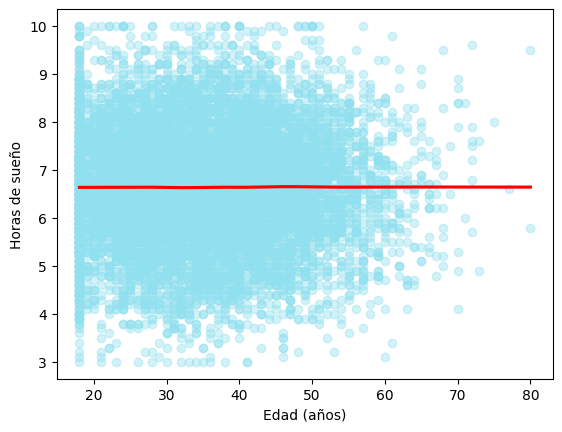

In [ ]:
sns.regplot(
    data=df_coffee,
    x='age',
    y='sleep_hours',
    scatter_kws={'alpha':0.4, 'color': '#90e0ef'},
    line_kws={'color':'red'},
    lowess=True
)
# plt.title('Relación entre edad y horas de sueño')
plt.xlabel('Edad (años)')
plt.ylabel('Horas de sueño')
plt.show()

**Interpretación**

Se puede observar que existe mucha dispersión de los datos, y que estos no parecieran seguir un perfil característico. La línea de regresión es practicamente horizontal (constante), esto se puede interpretar como que no pareciera existir una relación lineal ni monótona estadisticamente significativa.

#####**5.5.7.2 Justificción estadística**

Al igual que lo observado en el apartado anterior con physical_activity_hours, se deciden igualmente realizar el test de Pearson y Spearman a fines de confirmar lo que se observa visualmente.

In [ ]:
# === Test de correlación de Pearson ===

r, p = pearsonr(df_coffee['age'], df_coffee['sleep_hours'])

print(f"--- Test de Pearson ---")
print(f"Coeficiente r: {r:.3f}")
print(f"p-valor: {p:.4f}")


r_s, p_s = spearmanr(df_coffee['age'], df_coffee['sleep_hours'])

print(f"\n --- Test de Spearman ---")
print(f"Coeficiente ρ: {r_s:.3f}")
print(f"p-valor: {p_s:.4f}")


--- Test de Pearson ---
Coeficiente r: 0.005
p-valor: 0.6164

 --- Test de Spearman ---
Coeficiente ρ: 0.004
p-valor: 0.6650


**Resultado**

Se observa según lo esparado ambos coeficiente son muy cercanos a cero (r: 0.005 ,ρ: 0.004) y un p-valor >0.05. Por lo tanto no existe relación ni lineal ni monótona estadisticamente significativa entre ambas variables.

Por último, se decide evaluar si la presencia del grupo mas numeroso (jóvenes - primer bin del histograma univariado para edad-) puede afectar la relación entre las variables, por lo que se vuelve a hacer el test de Spearman pero solo en la población mayor de determinada edad , representada por el primer bin del histograma. Para conocer cual es ese valor se corre el siguiente código

In [ ]:
counts, bin_edges = np.histogram(df_coffee["age"], bins=20)
print(f"Primer bin: {bin_edges[0]} a {bin_edges[1]}")
print(f"Frecuencia: {counts[0]}")

Primer bin: 18.0 a 21.1
Frecuencia: 1393


Por lo tanto el primer bin esta contenido entre 18.0 y 21.1 años, por lo tanto se coloca mayor a esta último valor (>21.1) como límite para separar los subgrupos

In [ ]:
df_sin_jovenes = df_coffee[df_coffee['age'] > 21.1]
r_s, p_s = spearmanr(df_sin_jovenes['age'], df_sin_jovenes['sleep_hours'])

print(f"--- Test de Spearman ---")
print(f"Coeficiente ρ: {r_s:.3f}")
print(f"p-valor: {p_s:.4f}")

--- Test de Spearman ---
Coeficiente ρ: 0.002
p-valor: 0.8660


**Resultado**

Puesto que no sigue habiendo significación estadística (p>0.05), la población joven no estaria distorcionando la relación entre las variables analizadas.

---

#####**5.5.7.3 Conclusión**

---


*Se concluye que aunque exista una gran proporción de jóvenes adultos (< 21.1 años) que podrian estar sobre-representados en el dataset, estos no influyen en la relación entre las horas de sueño según las edades. Esta relación ya sea lineal como monótona mostró no existir tanto a nivel estadistico (p>0.05), siendo reforzado a nivel gráfico.*




---

---

####**5.5.8 Resúmen de análisis bivariado**


---

1. ¿Existe relación entre las horas de sueño y la percepción de la calidad del mismo?
2. ¿El mayor consumo de cafeína, se asocia a menos horas de sueño?

    a.  ¿Los consumidores de cafeína presentan un patrón de sueño distinto al de los no consumidores?

    b.  Dentro de la poblacíon de consumidores ¿Existe una asociación entre mayor ingesta de mg de cafeína y menor cantidad de horas de sueño?

3. ¿El mayor consumo de cafeína, se asocia a peor calidad de sueño?

    a. ¿Los no consumidores de cafeína presentan una calidad de sueño diferente a la de los consumidores?

    b. Dentro de la población de consumidores, ¿se observa una tendencia entre una mayor ingesta de cafeína (mg/día) y una menor calidad del sueño?

4. ¿Existe relación entre la cantidad de horas de sueño y el nivel de estrés o problemas de salud o actividad física?
5. ¿Existe algún efecto de la edad en relación a las horas de sueño?

1. *¿Existe relación entre las horas de sueño y la percepción de la calidad del mismo?*

**Relación analizada**: Horas de sueño [sleep_hours] (variable target) con calidad del sueño [sleep_quality] (numérica - categórica)

**Conclusión**:  A medida que aumenta la duración del sueño, las personas tienden a valorar su descanso como de mejor calidad. En conjunto, los hallazgos respaldan la hipótesis de que *una mayor cantidad de horas de sueño se asocia con una mejor percepción del descanso.*



2. ¿El mayor consumo de cafeína, se asocia a menos horas de sueño?

    a.  ¿Los consumidores de cafeína presentan un patrón de sueño distinto al de los no consumidores?

    b.  Dentro de la poblacíon de consumidores ¿Existe una asociación entre mayor ingesta de mg de cafeína y menor cantidad de horas de sueño?


**Relación analizada**:
*   **General** : Horas de sueño [sleep_hours] (variable target) con consumo de cafeína en mg [caffeine_mg] (numérica - numérica)

*    **inciso a**: Horas de sueño [sleep_hours] (variable target) con consumo de cafeína en mg [caffeine_mg] categorizado a consumidores y no consumidores (numérica - numérica categorizada)
*   **inciso b**: Horas de sueño [sleep_hours] (variable target) con consumo de cafeína en mg [caffeine_mg] (numérica - numérica) pero sobre la subpoblación de consumidores.


**Conclusión**:

*   **Inciso a**: Aunque gráficamente no se aprecian diferencias marcadas en las horas de sueño entre consumidores y no consumidores de cafeína, el test t de Welch indicó una diferencia significativa (p < 0.001), aunque de magnitud limitada.
*   **Inciso b**: La inclusión de no consumidores no modifica la tendencia general. Se observa una relación inversa leve y estadísticamente significativa (p < 0.001): a mayor ingesta de cafeína, menor duración promedio del sueño. En conjunto, los resultados respaldan la existencia de un vínculo real, aunque débil, entre el consumo de cafeína y la duración del sueño.






3. ¿El mayor consumo de cafeína, se asocia a peor calidad de sueño?

    a. ¿Los no consumidores de cafeína presentan una calidad de sueño diferente a la de los consumidores?

    b. Dentro de la población de consumidores, ¿se observa una tendencia entre una mayor ingesta de cafeína (mg/día) y una menor calidad del sueño?

**Relación analizada**:

* **General** : Calidad de sueño [sleep_quality] con consumo de cafeína en mg[caffeine_mg] (categórica - numérica)

* **Inciso a**: Calidad de sueño [sleep_quality] con consumo de cafeína en mg [caffeine_mg] categorizado a consumidores y no consumidores (numérica - numérica categorizada)

* **Inciso b**: Calidad de sueño [sleep_quality] con consumo de cafeína en mg [caffeine_mg] (numérica - numérica) pero sobre la subpoblación de consumidores.

**Conclusión**:

* **Inciso a**: Inciso a: La calidad del sueño difiere significativamente según el consumo de cafeína (Chi², p < 0.001). Aunque la magnitud del efecto es moderada, los resultados sugieren que el consumo de cafeína se asocia a una menor calidad percibida del descanso, lo que refuerza su posible rol como factor que afecta la percepción del sueño.
* **Inciso b**: Se observa una relación inversa y estadísticamente significativa entre la ingesta de cafeína (mg/día) y la calidad del sueño: a mayor consumo, peor calidad percibida. La asociación, de magnitud moderada, se mantiene tanto al considerar la muestra total como solo la subpoblación de consumidores, lo que refuerza la consistencia del hallazgo.

4. ¿Existe relación entre la cantidad de horas de sueño y el nivel de estrés o problemas de salud o actividad física?

**Relaciónes  analizadas**:

1.   Horas de sueño [sleep_hours] (variable target) con nivel de estrés [stress_level] (numérica - categórica)
2.   Horas de sueño [sleep_hours] (variable target) con problemas de salud [health_issues] (numérica - categórica)
3.   Horas de sueño [sleep_hours] (variable target) con horas de actividad física [physical_activity_hours] (numérica - numérica). Tambien se probo en segunda instancia, Calidad de sueño [sleep_quality] con horas de actividad física [physical_activity_hours] (categórica - numérica).

**Conclusiones**:

1.   Se observa una asociación negativa y estadísticamente significativa entre el nivel de estrés y las horas de sueño. A mayor nivel de estrés percibido, menor es la duración promedio del descanso.
2.  La presencia de problemas de salud se asocia con una menor cantidad promedio de horas de sueño, aunque la severidad no muestra una relación lineal con la reducción del sueño. Los grupos con problemas severos no difieren significativamente de los grupos con afectación leve o moderada (p ajustado = 0.147 y 0.741, respectivamente; corrección de Holm).
3.  Los resultados de Spearman y Kruskal–Wallis, junto con la evidencia gráfica, indican ausencia de asociación significativa entre las horas de actividad física semanal y tanto las horas como la calidad del sueño. En esta muestra, mayor o menor actividad física no se relaciona con dormir más o menos, ni con percibir un sueño de mejor o peor calidad.


5. ¿Existe algún efecto de la edad en relación a las horas de sueño?

**Relación analizada**: Edad [age]  con Horas sueño [sleep_hours] (numérica - numérica)

**Conclusión**:Aunque se observa una alta proporción de jóvenes adultos (<21.1 años) posiblemente sobre-representados en el conjunto de datos, esto no influye significativamente en la relación entre la edad y las horas de sueño.
A nivel gráfico, la línea de regresión horizontal sugiere la ausencia de una tendencia lineal entre ambas variables, lo cual se confirmó estadísticamente mediante el test no paramétrico de Spearman, que no evidenció correlación significativa (p > 0.05).
En consecuencia, no se observa asociación monótona entre la edad y la duración promedio del sueño en esta muestra.

###**5.6 Análisis exploratorio multivariado**

Del analisis bivariado se desprende que, los resultados permiten identificar qué variables presentan asociación significativa con las horas de sueño, variable objetivo del modelo:

*   **Calidad del sueño**: Se confirma una relación positiva y significativa: a mayor cantidad de horas dormidas, mejor es la calidad percibida del descanso.
*   **Consumo de cafeína**: Se observa una relación inversa, estadísticamente significativa pero de baja a moderada magnitud. A mayor ingesta de cafeína (mg/día), las personas tienden a dormir menos horas y a percibir una peor calidad del sueño.
*   **Estrés**: Existe una asociación negativa significativa: a medida que aumenta el nivel de estrés percibido, disminuye la duración promedio del sueño.
*   **Problemas de salud**:Las personas con problemas de salud duermen, en promedio, menos horas que las sanas. Sin embargo, no se observan diferencias significativas entre los distintos niveles de severidad (moderado vs. severo).
*   **Actividad física y edad:** No se evidenció relación lineal ni monótona significativa entre las horas de sueño y las horas de actividad física semanal, ni entre las horas de sueño y la edad.


Por lo tanto se decide responder al último interrogante

*¿Existen relaciones significativas entre las horas de sueño (`sleep_hours`) y las distintas características individuales (edad, hábitos, fisiología y demografía)?*

Por lo tanto, se analizará la relación de `sleep_hours` con:

*  ` bmi` (numérica continua)
*   `heart_rate` (numérica discreta)
*   `gender` (categórica nominal)
*   `country `(categórica nominal)
*   `occupation `(categórica nominal)
*   `smoking` (categórizada era una binomial)
*   `alcohol_consumption` (categórizada era una binomial)










#####**5.6.1 Visualizaciones y justificación estadística**

Se decide hacer una gran tabla de resumen donde se muestran los modelos estadisticos aplicados, el estadístico utilizado, el p-valor y si la relacíon es significativa. Luego con esto se realizará un heatmap, para evidenciar la relaciones de manera gráfica.

**Justificación de elección de los test estadísticos**

Se realizan los distintos test estadísticos dependiendo del tipo de variable (por eso se incluye en la tabla) y el tipo de relación a evaluar vs la variable target (sleep_hours - numérica contínua-).

*   Variables numéricas como `hear_rate` y `bmi`, **Coeficiente de correlación de Spearman**. Este es un test no paramétrico utilizado para testar relaciones entra variables numéricas cuando al menos una de ellas no sigue una distribución normal. Evalua la existencia de letación monótona (a medida que una sube, la otra tiende a subir o bajar) sin exigir que sea lineal.
*  Variables binarias como `smoking` y `alcohol_consumption`, al ser dicotómica y solo poder tomar dos valores posibles -dos grupos- se utiliza el test de **Mann-Whitney U** (equivalente no paramétrico del t-test independiente) para comparar si la distribución de `sleep_hours` difiere seignificativamente entre ambos grupos. No requiere de supuestos de normalidad o homogeneidad de varianzas.
*   Variables categóricas con mas de 2 grupos para `country`, `occupation`, `gender` (en este caso gender tiene 3 categorias, sino se deberia haber utilizado Mann-Whitney U), se utiliza la extesión del test de Mann-Whitney U para mas de dos grupos, el test de **Kruskal–Wallis**. Este test se utiliza para comparar la distribución de una variable contínua (`sleep_hours`) entre tres o más categirias. Al igual que el anterior no requiere de supuestos de normalidad o homogeneidad de varianzas.



In [ ]:
target = 'sleep_hours'
variables = ['bmi', 'heart_rate', 'gender', 'country', 'occupation', 'smoking', 'alcohol_consumption']

resultados = []

for var in variables:
    if var in ['bmi', 'heart_rate']:
        # Correlación Spearman
        rho, p = spearmanr(df_coffee[target], df_coffee[var], nan_policy='omit')
        resultados.append([var, 'numérica', 'Spearman', rho, p])
    elif df_coffee[var].nunique() == 2:
        # Mann–Whitney para binaria
        grupo1 = df_coffee.loc[df_coffee[var] == df_coffee[var].unique()[0], target]
        grupo2 = df_coffee.loc[df_coffee[var] == df_coffee[var].unique()[1], target]
        stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
        resultados.append([var, 'binaria', 'Mann–Whitney', stat, p])
    else:
        # Kruskal–Wallis para categóricas nominales
        grupos = [df_coffee.loc[df_coffee[var] == cat, target].dropna()
                  for cat in df_coffee[var].unique()]
        stat, p = kruskal(*grupos)
        resultados.append([var, 'categórica', 'Kruskal–Wallis', stat, p])

# Crear tabla final
tabla = pd.DataFrame(resultados, columns=['Variable', 'Tipo', 'Test', 'Estadístico', 'p_valor'])

# Redondea valores numéricos
tabla['Estadístico'] = tabla['Estadístico'].round(2)
tabla['p_valor'] = tabla['p_valor'].round(4)

# Personalización en forma de notación (eviata la científica)
tabla['Estadístico'] = tabla['Estadístico'].apply(lambda x: f"{x:.2f}")

# Agregar columna de significancia
tabla['Significativa'] = tabla['p_valor'] < 0.05

# Ordenar por p-valor
tabla.sort_values('p_valor', inplace=True)

tabla


  #Interpretación

#Significativa = True
  #Hay evidencia estadística suficiente para rechazar la hipótesis nula → la variable sí se asocia significativamente con sleep_hours.

#Significativa = False
   #No hay evidencia estadística de relación → la variable no muestra asociación significativa con sleep_hours.

,Variable,Tipo,Test,Estadístico,p_valor,Significativa
1,heart_rate,numérica,Spearman,-0.04,0.0002,True
5,smoking,binaria,Mann–Whitney,7897933.50,0.3235,False
0,bmi,numérica,Spearman,0.01,0.3896,False
3,country,categórica,Kruskal–Wallis,19.41,0.4306,False
4,occupation,categórica,Kruskal–Wallis,2.57,0.6329,False
2,gender,categórica,Kruskal–Wallis,0.34,0.8436,False
6,alcohol_consumption,binaria,Mann–Whitney,10533688.50,0.8816,False


**Resultado**

Solo la variable heart_rate (frecuencia cardíaca en reposo) mostró una relación estadísticamente significativa con las horas de sueño (p = 0.0002).
El coeficiente de Spearman (ρ = -0.04) indica una correlación negativa muy débil, lo que sugiere que, a medida que aumenta la frecuencia cardíaca, las horas de sueño tienden a disminuir ligeramente.
Si bien la asociación es significativa, su magnitud es baja, por lo que el efecto no parece relevante en términos prácticos.

En cambio, las demás variables —BMI, género, país, ocupación, tabaquismo y consumo de alcohol— presentaron valores de p > 0.05, sin diferencias estadísticamente significativas en las horas de sueño entre sus categorías.
Esto indica que, dentro de esta muestra, dichas variables no se asocian de manera clara con la cantidad de horas dormidas.

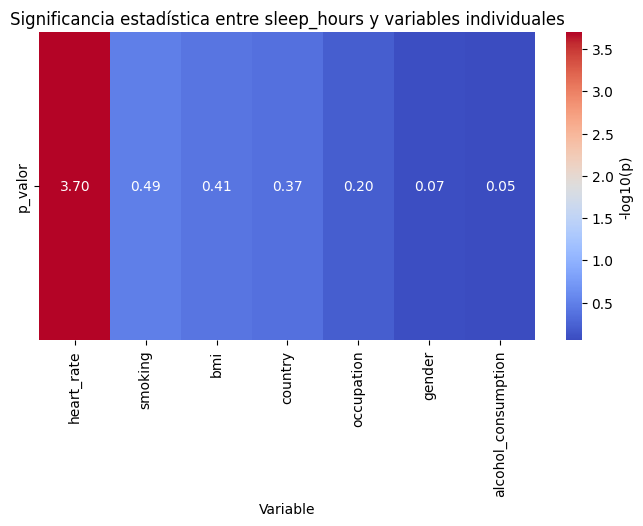

In [ ]:
# === Heatmap ===
plt.figure(figsize=(8,4))
sns.heatmap(-np.log10(tabla.set_index('Variable')['p_valor']).to_frame().T,
            cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': '-log10(p)'})
plt.title('Significancia estadística entre sleep_hours y variables individuales')
plt.show()

**Interpretación**

El gráfico muestra la significancia estadística de las asociaciones entre las horas de sueño y las distintas variables individuales, expresada como -log10(p).
Solo la variable heart_rate supera el umbral de significancia (p < 0.05), lo que indica que su relación con `sleep_hours` es estadísticamente significativa.
Las demás variables no presentan evidencia de asociación significativa con las horas de sueño.

---

#####**5.6.2 Conclusión**



---
Tanto el análisis estadístico como la representación gráfica muestran que solo la variable heart_rate presenta una asociación estadísticamente significativa con las horas de sueño (p < 0.001).
Sin embargo, el coeficiente de correlación de Spearman (ρ = -0.04) indica que esta relación es negativa y de magnitud débil, por lo que, aunque existe una asociación, su efecto sobre la duración del sueño es mínimo.

Las demás variables analizadas —BMI, género, país, ocupación, tabaquismo y consumo de alcohol— no muestran relaciones significativas (p > 0.05), lo que sugiere que en esta muestra no influyen de forma apreciable en la cantidad promedio de horas dormidas.

Concluyendo, los resultados confirman que, entre las características individuales evaluadas, solo la frecuencia cardíaca se asocia de forma estadísticamente significativa con las horas de sueño, aunque dicha relación carece de relevancia práctica por su baja magnitud.




---



###**5.7 Tratamiento de valores atipico (outliers)**

Finalmente, antes de realizar las conclusiones finales y establecer cuáles serán las variables predictoras del modelo de regresión, se debe analizar la presencia de valores atípicos.
En este apartado se evalúa si dichos valores modifican o no los resultados obtenidos en los análisis univariados y bivariados, con el fin de definir el criterio de tratamiento más adecuado.

Durante el análisis univariado se identificaron outliers en varias variables numéricas mediante el método del rango intercuartílico (IQR), considerando como valores atípicos aquellos que se ubicaron fuera del rango definido por
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR y
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR.

Las variables afectadas fueron: `coffee_intake`, `caffeine_mg`, `sleep_hours`, `bmi`, y `heart_rate`. En todos los casos, los valores extremos correspondieron a observaciones infrecuentes pero plausibles desde el punto de vista fisiológico o conductual (por ejemplo, consumos de cafeína elevados, horas de sueño prolongadas o actividad física intensa).

En el análisis bivariado, estos valores se observaron principalmente en las relaciones entre sleep_hours y variables como stress_level, health_issues y sleep_quality, donde ampliaron la dispersión en ciertas categorías (especialmente en “Poor” y “Excellent” de calidad de sueño). Sin embargo, las tendencias generales y la dirección de las asociaciones se mantuvieron consistentes.



#####**5.7.1 Evaluación del impacto de los outliers en análisis univariado**

######**5.7.1.1 Eliminación de outliers según método IQR (Rango Intercuartílico)** texto en cursiva

In [ ]:
len(df_coffee) #verificación del N original del df_coffee


10000

In [ ]:
#creacion de variable de eliminación de outliers
def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_no_outliers, lower, upper


In [ ]:
#Variables evaluadas en análisis univariado que presentaron outliers
variables_outliers = [
    'age', 'coffee_intake', 'caffeine_mg',
    'sleep_hours', 'bmi', 'heart_rate'
]
N0 = len(df_coffee) #de esta forma mentiene el N original del dataset para cada variable

# Se realiza una copia del df original y se renombra
df_w_o_outliers = df_coffee.copy()

# Se realiza una tabla de resultados para mejor visualización contrastando con valores de N pre y post eliminacion
# cuantos datos se eleiminaron y su porcentual.
rows_iso = []

for var in variables_outliers:
    df_w_o_outliers, low, up = remove_outliers_iqr(df_w_o_outliers, var)
    n_after = len(df_w_o_outliers)

    rows_iso.append({
        "Variable": var,
        "Límite inferior (IQR)": round(low, 2),
        "Límite superior (IQR)": round(up, 2),
        "N inicial": N0,
        "N después": n_after,
        "Removidos": N0 - n_after,
        "% removidos": round(100*(N0 - n_after)/N0, 2)
    })

tabla_outliers = pd.DataFrame(rows_iso, columns=[
    "Variable", "Límite inferior (IQR)", "Límite superior (IQR)",
    "N inicial", "N después",
    "Removidos", "% removidos"
])

tabla_outliers


,Variable,Límite inferior (IQR),Límite superior (IQR),N inicial,N después,Removidos,% removidos
0,age,0.50,68.50,10000,9975,25,0.25
1,coffee_intake,-1.50,6.50,10000,9936,64,0.64
2,caffeine_mg,-149.49,618.21,10000,9930,70,0.70
3,sleep_hours,3.25,10.05,10000,9904,96,0.96
4,bmi,13.35,34.55,10000,9867,133,1.33
5,heart_rate,44.50,96.50,10000,9819,181,1.81


**Interpretación**

Con el análisis aislado por variable, se observa un porcentaje de filas eliminadas es <1% para `age`, `coffee_intake`, `caffeine_mg` y `sleep_hours`, y apenas superior al 1% para `bmi` (1,33%) y `heart_rate` (1,81%). Dado el N inicial = 10.000, la proporción removida es baja.


NOTA: aquellas variables cuyo rango inicia en cero (`coffe_intake`, `caffeine_mg`), presentan limites inferiores poco probales por ser negativo. Estos no se consideran, y no se interpreta para la detección; en la práctica, la evaluación de outliers recae solo en la cola superio

######**5.7.1.2 Comparación de efectos sobre la distribución (observado en anealisis univariado)**

In [ ]:
comparacion = []

for var in variables_outliers:
    media_original = df_coffee[var].mean()
    media_sin_outliers = df_w_o_outliers[var].mean()
    mediana_original = df_coffee[var].median()
    mediana_sin_outliers = df_w_o_outliers[var].median()

    comparacion.append([var, media_original, media_sin_outliers, mediana_original, mediana_sin_outliers])

df_comp = pd.DataFrame(comparacion, columns=["Variable", "Media original", "Media sin outliers", "Mediana original", "Mediana sin outliers"])

df_comp.style.format({
    "Media original": "{:.1f}",
    "Media sin outliers": "{:.1f}",
    "Mediana original": "{:.1f}",
    "Mediana sin outliers": "{:.1f}",
})


,Variable,Media original,Media sin outliers,Mediana original,Mediana sin outliers
0,age,34.9,34.9,34.0,34.0
1,coffee_intake,2.5,2.5,2.5,2.5
2,caffeine_mg,238.4,236.3,235.4,234.7
3,sleep_hours,6.6,6.6,6.6,6.6
4,bmi,24.0,23.9,24.0,24.0
5,heart_rate,70.6,70.5,71.0,71.0


**Interpretación**

La única variable que muestra una diferencia en su mediana tras la eliminación de outliers es `caffeine_mg`; sin embargo, dicha variación es inferior al 5 %. Esto indica que los valores atípicos no modifican de forma apreciable la tendencia central del conjunto de datos.
En general, las diferencias entre medias y medianas antes y después del filtrado son mínimas, lo que indica que los outliers son pocos y no alteran de manera relevante la distribución de las variables.

Se realiza la visualización solo para la variable que presentó diferencias en la mediana, comparando el histograma original con el obtenido tras eliminar los outliers. Se utiliza el parámetro `stat='density'` para que ambas distribuciones, con distinto tamaño de muestra, sean comparables: de este modo el área bajo cada curva equivale a 1 y las alturas reflejan densidades relativas en lugar de frecuencias absolutas.

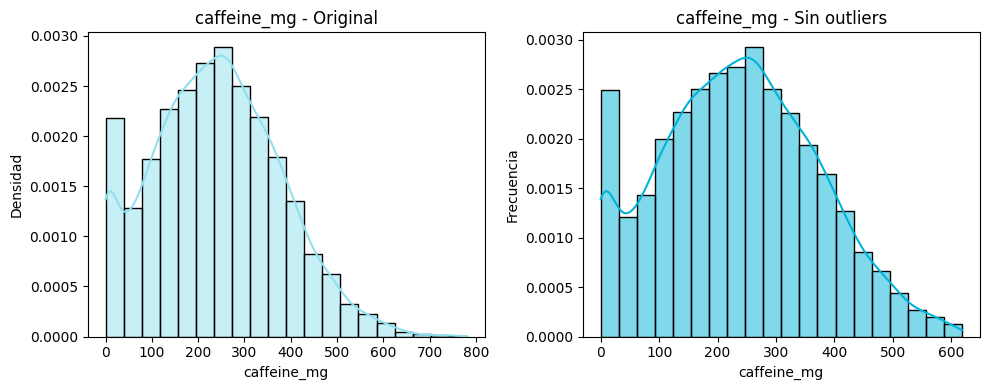

In [ ]:
#variable con diferencias en la mediana original vs sin outliers
var = 'caffeine_mg'

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histograma original
sns.histplot(
    data=df_coffee,
    x=var,
    bins=20,
    kde=True,
    stat='density', # en el eje Y proporción relativa (contemplando un área total de aproximadamente 1 )
    color='#90e0ef',
    ax=axes[0]
)
axes[0].set_title(f"{var} - Original")
axes[0].set_xlabel(var)
axes[0].set_ylabel("Densidad")

# Histograma sin outliers
sns.histplot(
    data=df_w_o_outliers,
    x=var,
    bins=20,
    kde=True,
    stat='density',
    color='#00b4d8',
    ax=axes[1]
)
axes[1].set_title(f"{var} - Sin outliers")
axes[1].set_xlabel(var)
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


**Interpretación**

Al eliminar los outliers, la forma general de la distribución de caffeine_mg se mantiene. El histograma y la curva de densidad conservan la asimetría positiva y el patrón unimodal. Solo se aprecia una leve disminución en la curtosis, producto de la eliminación de algunos valores altos, por lo que la distribución conserva su estructura principal.

#####**5.7.2 Evaluación del impacto de los outliers en relaciones bivariadas**







Se realiza un análisis estadístico comparativo entre los resultados obtenidos con y sin outliers, con el objetivo de evaluar si la eliminación de valores extremos modifica la significancia estadística observada en el análisis bivariado de aquellas relaciones donde se habían detectado datos atípicos.

Se utiliza el test no paramétrico de Kruskal–Wallis, dado que en todos los casos se compara una variable numérica continua con una variable categórica de tres o más niveles, sin asumir supuestos de normalidad ni de homogeneidad de varianzas.

In [ ]:
from scipy.stats import kruskal


# Relaciones a evaluar
relaciones_bi = [
    ('sleep_hours', 'sleep_quality'),
    ('caffeine_mg', 'sleep_quality'),
    ('sleep_hours', 'stress_level'),
    ('sleep_hours', 'health_issues')
]

resultados = []

for var_y, var_x in relaciones_bi:
    # --- Con outliers ---
    grupos_original = [df_coffee.loc[df_coffee[var_x] == cat, var_y].dropna()
                       for cat in df_coffee[var_x].unique()]
    stat_orig, p_orig = kruskal(*grupos_original)

    # --- Sin outliers ---
    grupos_w_o_outliers = [df_w_o_outliers.loc[df_w_o_outliers[var_x] == cat, var_y].dropna()
                           for cat in df_w_o_outliers[var_x].unique()]
    stat_w_o_outliers, p_w_o_outliers = kruskal(*grupos_w_o_outliers)

    # Interpretación automática de significancia
    interpretacion = []
    for p in [p_orig, p_w_o_outliers]:
        if p < 0.001:
            interpretacion.append('*** p < 0.001 (Altamente significativo)')
        elif p < 0.01:
            interpretacion.append('** p < 0.01 (Muy significativo)')
        elif p < 0.05:
            interpretacion.append('* p < 0.05 (Significativo)')
        else:
            interpretacion.append('ns (No significativo)')

    resultados.append({
        'Relación': f"{var_y} vs {var_x}",
        'H (original)': f"{stat_orig:.2f}",
        'p (original)': f"{p_orig:.3f}",
        'Significancia (original)': interpretacion[0],
        'H (sin outliers)': f"{stat_w_o_outliers:.2f}",
        'p (sin outliers)': f"{p_w_o_outliers:.3f}",
        'Significancia (sin outliers)': interpretacion[1]
    })

# Crear DataFrame final
tabla_resultados = pd.DataFrame(resultados)
tabla_resultados


,Relación,H (original),p (original),Significancia (original),H (sin outliers),p (sin outliers),Significancia (sin outliers)
0,sleep_hours vs sleep_quality,8080.60,0.000,*** p < 0.001 (Altamente significativo),7917.15,0.000,*** p < 0.001 (Altamente significativo)
1,caffeine_mg vs sleep_quality,304.74,0.000,*** p < 0.001 (Altamente significativo),296.60,0.000,*** p < 0.001 (Altamente significativo)
2,sleep_hours vs stress_level,6483.59,0.000,*** p < 0.001 (Altamente significativo),6332.54,0.000,*** p < 0.001 (Altamente significativo)
3,sleep_hours vs health_issues,3958.70,0.000,*** p < 0.001 (Altamente significativo),3934.07,0.000,*** p < 0.001 (Altamente significativo)


**Resultados**

Se puede observar las relaciones entre sleep_hours y las variables categóricas (sleep_quality, stress_level, health_issues), así como entre caffeine_mg y sleep_quality, se mantienen altamente significativas incluso tras la eliminación de outliers.
Esto sugiere que los valores extremos no alteran las conclusiones del análisis bivariado.



---

#####**5.7.3 Conclusión**

Se concluye, a partir de la evaluación del impacto de los outliers tanto en el análisis univariado como en las relaciones bivariadas, que la eliminación de los valores extremos no modifica de manera significativa las distribuciones individuales ni las asociaciones entre variables.
Por lo tanto, no resulta necesario eliminar los valores atípicos antes del modelado, dado que reflejan variabilidad real dentro de la muestra y su exclusión no aportaría mejoras sustanciales al ajuste del modelo predictivo.

###**5.8 Conclusión general y toma de decisiones para el modelado**

A partir de los análisis realizados —univariado, bivariado, multivariado y de evaluación de outliers— fue posible identificar las variables más vinculadas con la cantidad de horas de sueño (sleep_hours), que será la variable objetivo del modelo de regresión.

Las variables numéricas presentaron distribuciones estables y acordes a lo esperado desde el punto de vista fisiológico. Los valores atípicos detectados en `coffee_intake`, `caffeine_mg`, `bmi`, `heart_rate` y `age` representan casos poco frecuentes pero posibles dentro de la población, mientras que `physical_activity_hours` no mostró outliers según el criterio del rango intercuartílico (IQR).
La comparación de los resultados con y sin estos valores confirmó que su presencia no altera la significancia estadística ni las tendencias observadas, por lo que se decidió mantenerlos en el conjunto final de datos.

En el análisis bivariado se observaron patrones claros. Dormir más horas se relaciona con una mejor calidad percibida del sueño (`sleep_quality`), mientras que un mayor consumo de cafeína (`caffeine_mg`) se asocia con una reducción moderada del descanso. También se identificó que niveles altos de estrés (`stress_level`) y la presencia de problemas de salud (`health_issues`) se vinculan con menos horas de sueño.

Por el contrario, variables como la edad, la actividad física, el género o el consumo de alcohol y tabaco no mostraron relación significativa con la duración del sueño.

El análisis multivariado indicó que la frecuencia cardíaca (`heart_rate`) mantiene una asociación estadísticamente significativa pero débil con las horas de sueño (ρ = –0.04), por lo que su valor predictivo es limitado.



---

En síntesis, los resultados respaldan la selección de las siguientes **variables como predictoras** principales del modelo: **calidad del sueño [`sleep_quality`], consumo de cafeína [`caffeine_mg o coffee_intake`], nivel de estrés [`stress_level`], problemas de salud [`health_issues`] y frecuencia cardíaca [`heart_rate`]**.
Estas variables reflejan factores conductuales y fisiológicos que influyen de manera más directa en la duración del descanso, mientras que el resto aporta información complementaria o de contexto.


---






---
---

Debido a que las asociaciones fueron en general débiles, el modelo se desarrollará con un enfoque exploratorio, centrado en comprender los factores que más influyen en el sueño y no en predecir con precisión su duración. Este enfoque permite obtener información útil para futuras acciones de promoción del descanso saludable.

---
---





# **ANEXO I**


---

##**Visualizaciones para storytelling**


---



###**Variable target sleep_hours**

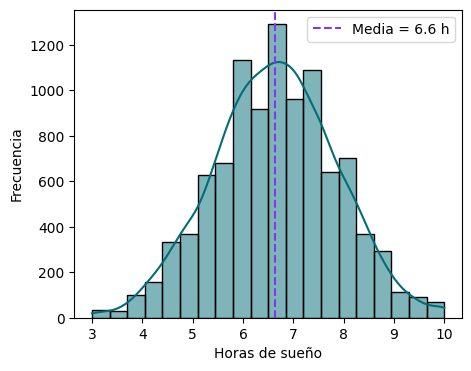

In [ ]:
# ==== Histograma ====

#Creación
plt.figure(figsize=(5,4))
sns.histplot(data=df_coffee, x='sleep_hours', kde=True, bins=20, color='#006d77')

# Línea vertical en la media
mean_value = df_coffee["sleep_hours"].mean()
plt.axvline(mean_value, color='#8338ec', linestyle='--', linewidth=1.5, label=f"Media = {mean_value:.1f} h")

# plt.title('Distribución de horas de sueño')
plt.xlabel('Horas de sueño')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

# Guardar con fondo transparente
plt.figure(figsize=(5,4))
sns.histplot(data=df_coffee, x='sleep_hours', kde=True, bins=20, color='#006d77')
plt.axvline(mean_value, color='#8338ec', linestyle='--', linewidth=1.5, label=f"Media = {mean_value:.1f} h")
# plt.title('Distribución de horas de sueño')
plt.xlabel('Horas de sueño')
plt.ylabel('Frecuencia')
plt.legend()

plt.savefig("sleep_hours.png", dpi=300, bbox_inches='tight', transparent=True)
plt.close()



In [ ]:
#Tabla descriptiva resumida
tabla_sleep = df_coffee["sleep_hours"].agg(["mean", "median", "std", "min", "max"]).round(1).to_frame(name="Horas de sueño").T
tabla_sleep


,mean,median,std,min,max
Horas de sueño,6.6,6.6,1.2,3.0,10.0


In [ ]:
#formateo para poder exportala y usarla en el Powerpoit
fig, ax = plt.subplots(figsize=(5, 1.2))
ax.axis('off')

tabla = ax.table(cellText=tabla_sleep.values,
                 colLabels=tabla_sleep.columns,
                 rowLabels=tabla_sleep.index,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Guardar con fondo transparente
plt.savefig("tabla_sleep.png", dpi=300, bbox_inches='tight', transparent=True)
plt.close()

In [ ]:
# #Definicion de los datos
x = df_coffee["sleep_hours"]

# # === Boxplot===
plt.figure(figsize=(5,1.2))
sns.boxplot(x=x, color='#83c5be', width=0.5, fliersize=3)
plt.xlabel("Horas de sueño")
plt.ylabel("")  # sin etiqueta lateral
plt.title("")   # sin título
sns.despine(left=True)

# # Exportar como imagen con fondo transparente
plt.savefig("boxplot_sleep_hours.png", dpi=300, bbox_inches='tight', transparent=True)

plt.close()

###**Prinipales hallazgos del EDA**




####**Sleep_hours vs sleep_quality**

In [ ]:


# ==== Violinplot Plotly ====

# Paleta personalizada: tonos entre púrpura y teal
custom_palette = [
    '#7b2cbf',  # violeta oscuro
    '#9d4edd',  # violeta claro
    '#2a9d8f',  # verde teal-like
    '#006d77'   # verde teal
]

fig = px.violin(
    df_coffee,
    x='sleep_quality',
    y='sleep_hours',
    box=True,
    points='all',
    color='sleep_quality',
    color_discrete_sequence=custom_palette
)

fig.update_layout(
    width=1200,
    height=750,
    paper_bgcolor='rgba(0,0,0,0)',   # Fondo general transparente
    plot_bgcolor='rgba(0,0,0,0)',    # Fondo del área del gráfico transparente
    title_font=dict(size=16, color='#2a2a2a'),
    xaxis_title='Calidad del sueño percibida',
    yaxis_title='Horas de sueño',
    xaxis=dict(categoryorder='array',
               categoryarray=['Poor', 'Fair', 'Good', 'Excellent'])
)

# ==== Exportar con fondo transparente (sin argumento extra) ====
# fig.write_image("violin_sleep.png", scale=3)
fig.write_html("boxplot_sleep_hours_interactivo.html", include_plotlyjs="cdn")


# (Opcional) Mostrar el gráfico
fig.show()



####**Sleep_hours vs caffeine_mg**

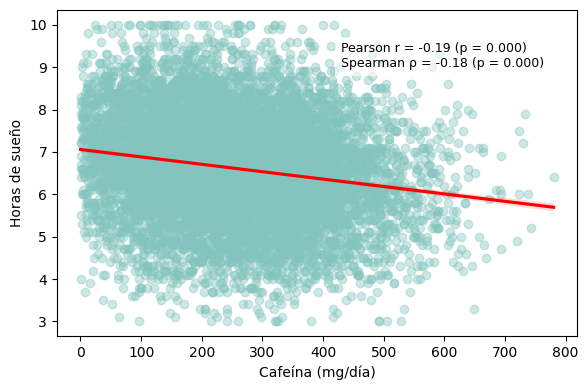

In [ ]:
# === REGPLOT + Estdadisticos y p-valor ===

# Filtrar solo consumidores
df_consumo = df_coffee[df_coffee['caffeine_mg'] > 0]

x = df_consumo["caffeine_mg"]
y = df_consumo["sleep_hours"]

# Calcular correlaciones
pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

# Regplot
plt.figure(figsize=(6,4))
sns.regplot(
    data=df_consumo,
    x="caffeine_mg",
    y="sleep_hours",
    scatter_kws={"alpha":0.4, "color":"#83c5be"},
    line_kws={"color":"red"}
)

plt.xlabel("Cafeína (mg/día)")
plt.ylabel("Horas de sueño")

# Texto con resultados
plt.text(
    x=max(x)*0.55, y=max(y)*0.9,
    s=(
        f"Pearson r = {pearson_corr:.2f} (p = {pearson_p:.3f})\n"
        f"Spearman ρ = {spearman_corr:.2f} (p = {spearman_p:.3f})"
    ),
    fontsize=9,
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
)

# Fondo transparente
plt.gcf().patch.set_alpha(0)  # transparencia de la figura
plt.tight_layout()

# Exportar a PNG con fondo transparente
plt.savefig("sleep_vs_caffeine.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


####**Sleep_hours vs stress_level**

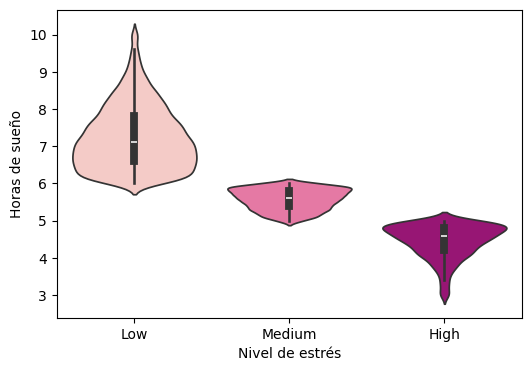

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(
    data=df_coffee,
    x="stress_level",
    y="sleep_hours",
    hue="stress_level",
    palette="RdPu",
    legend=False,
    inner="box"
)

plt.xlabel("Nivel de estrés")
plt.ylabel("Horas de sueño")

# Quitar fondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0)

# Guardar antes de mostrar
plt.savefig("violinplot_stress_sleep.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()
plt.close()


####**Sleep_hours vs health_issues**

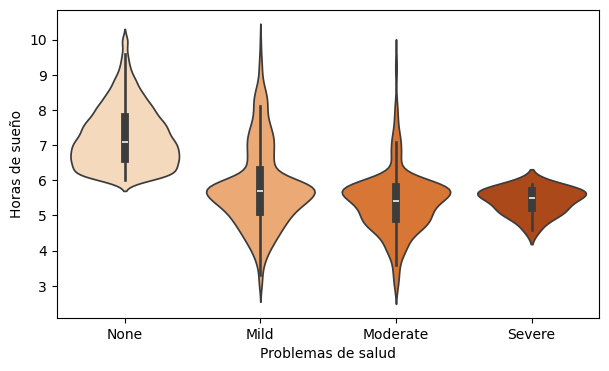

In [ ]:
# ==== Violinplot ====

custom_palette = sns.color_palette("Oranges", n_colors=df_coffee["health_issues"].nunique()) #paleta personalizada

plt.figure(figsize=(7,4))
sns.violinplot(
    data=df_coffee,
    x="health_issues",
    y="sleep_hours",
    hue="health_issues",
    palette=custom_palette,
    legend=False,
    inner="box"   # agrega la caja con mediana y cuartiles
)

# plt.title("Horas de sueño según problemas de salud")
plt.xlabel("Problemas de salud")
plt.ylabel("Horas de sueño")


# Quitar fondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0)

# Guardar antes de mostrar
plt.savefig("violinplot_health_sleep.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()
plt.close()


####**Sleep_hours vs age**

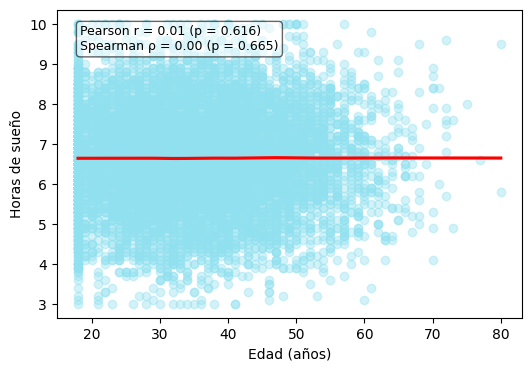

In [ ]:
pearson_r, pearson_p = pearsonr(df_coffee['age'], df_coffee['sleep_hours'])
spearman_r, spearman_p = spearmanr(df_coffee['age'], df_coffee['sleep_hours'])

#== Scatterplot con línea de regresión -REGPLOT- ===
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(
    data=df_coffee,
    x='age',
    y='sleep_hours',
    scatter_kws={'alpha':0.4, 'color': '#90e0ef'},
    line_kws={'color':'red'},
    lowess=True,
    ax=ax
)

ax.set_xlabel('Edad (años)')
ax.set_ylabel('Horas de sueño')

# Texto con correlaciones
textstr = (
    f"Pearson r = {pearson_r:.2f} (p = {pearson_p:.3f})\n"
    f"Spearman ρ = {spearman_r:.2f} (p = {spearman_p:.3f})"
)
ax.text(
    0.05, 0.95, textstr,
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.6)
)

# Fondo transparente
ax.set_facecolor('none')
fig.patch.set_alpha(0)

# Guardar con transparencia
fig.savefig(
    "scatter_age_sleep_corr.png",
    dpi=300,
    bbox_inches='tight',
    transparent=True
)

plt.show()
plt.close(fig)

####**Análisis multivariado**

In [ ]:
# === Versión duplicada del análisis original ===

target2 = 'sleep_hours'
variables2 = ['bmi', 'heart_rate', 'gender', 'country', 'occupation', 'smoking', 'alcohol_consumption']

resultados2 = []

for var in variables2:
    if var in ['bmi', 'heart_rate']:
        # Correlación Spearman
        rho, p = spearmanr(df_coffee[target2], df_coffee[var], nan_policy='omit')
        resultados2.append([var, 'numérica', 'Spearman', rho, p])

    elif df_coffee[var].nunique() == 2:
        # Mann–Whitney para binaria
        grupo1 = df_coffee.loc[df_coffee[var] == df_coffee[var].unique()[0], target2].dropna()
        grupo2 = df_coffee.loc[df_coffee[var] == df_coffee[var].unique()[1], target2].dropna()
        stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
        resultados2.append([var, 'binaria', 'Mann–Whitney', stat, p])

    else:
        # Kruskal–Wallis para categóricas nominales
        grupos = [df_coffee.loc[df_coffee[var] == cat, target2].dropna()
                  for cat in df_coffee[var].unique()]
        stat, p = kruskal(*grupos)
        resultados2.append([var, 'categórica', 'Kruskal–Wallis', stat, p])

# Crear tabla final
tabla2 = pd.DataFrame(resultados2, columns=['Variable', 'Tipo', 'Test', 'Estadístico', 'p_valor'])

# Redondea valores numéricos
tabla2['Estadístico'] = tabla2['Estadístico'].round(2)
tabla2['p_valor'] = tabla2['p_valor'].round(4)

# Personalización en forma de notación (evita la científica)
tabla2['Estadístico'] = tabla2['Estadístico'].apply(lambda x: f"{x:.2f}")

# Agregar columna de significancia
tabla2['Significativa'] = tabla2['p_valor'] < 0.05

# Ordenar por p-valor
tabla2.sort_values('p_valor', inplace=True)

tabla2


,Variable,Tipo,Test,Estadístico,p_valor,Significativa
1,heart_rate,numérica,Spearman,-0.04,0.0002,True
5,smoking,binaria,Mann–Whitney,7897933.50,0.3235,False
0,bmi,numérica,Spearman,0.01,0.3896,False
3,country,categórica,Kruskal–Wallis,19.41,0.4306,False
4,occupation,categórica,Kruskal–Wallis,2.57,0.6329,False
2,gender,categórica,Kruskal–Wallis,0.34,0.8436,False
6,alcohol_consumption,binaria,Mann–Whitney,10533688.50,0.8816,False


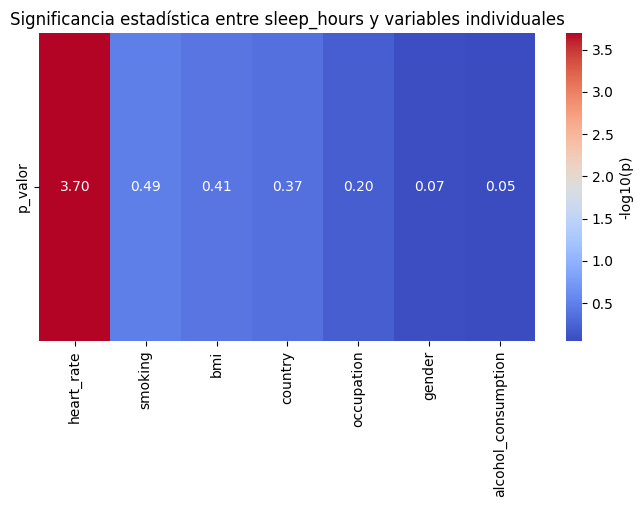

In [ ]:
# Copia segura de p-valores
df_p2 = (
    tabla2[['Variable', 'p_valor']]
    .dropna(subset=['p_valor'])
    .copy()
)

# Evita -log10(0) y valores problemáticos
eps = 1e-300
df_p2['p_valor'] = df_p2['p_valor'].clip(lower=eps)

# Calcula -log10(p)
df_stat2 = (-np.log10(df_p2.set_index('Variable')['p_valor'])).to_frame().T

# === HEATMAP ===
fig, ax = plt.subplots(figsize=(8, 4))

sns.heatmap(
    df_stat2,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    cbar_kws={'label': '-log10(p)'},
    ax=ax
)

ax.set_title('Significancia estadística entre sleep_hours y variables individuales')
ax.set_ylabel("")
ax.set_xlabel("")

# Fondo transparente
ax.set_facecolor('none')
fig.patch.set_alpha(0)

# Exportar con transparencia
fig.savefig(
    "heatmap_significancia_sleep2.png",
    dpi=300,
    bbox_inches='tight',
    transparent=True
)

plt.show()
plt.close(fig)